# Malicious and Benign Websites Project

## 1. Environment preparation

Loading packages and checking their versions.

In [1]:
import sys #access to system parameters
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis
print("pandas version: {}". format(pd.__version__))

import matplotlib as mpl #collection of functions for visualization
print("matplotlib version: {}". format(mpl.__version__))
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns 
print("Seaborn version: {}". format(sns.__version__))

import numpy as np #a package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #for printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))
from sklearn import preprocessing, feature_selection, model_selection, metrics, svm, tree, linear_model, neighbors, ensemble
from sklearn import cluster, datasets, mixture, decomposition
from xgboost import XGBClassifier

from datetime import datetime
import time
import warnings

Python version: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
pandas version: 0.24.2
matplotlib version: 3.1.0
Seaborn version: 0.9.0
NumPy version: 1.16.4
SciPy version: 1.3.0
IPython version: 7.5.0
scikit-learn version: 0.21.2


In [2]:
# import warnings filter
from warnings import simplefilter, filterwarnings
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
filterwarnings('ignore')

## 2. Data loading and basic cleaning 

In [3]:
path =r'dataset.csv' #path to the dataset file 
raw_data = pd.read_csv(path)
raw_data.head(10)

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   
5  B0_2064          18                          7       UTF-8   
6   B0_462          18                          6  iso-8859-1   
7  B0_1128          19                          6    us-ascii   
8    M2_17          20                          5       utf-8   
9    M3_75          20                          5       utf-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0          None           None   
1          Apache/2.4.10         15087.0          None           None   
2  Microsoft-HTTPAPI/2.0           324.0          None           None   
3                  nginx           162.0            US             AK   
4                   None        124140.0            US             TX   
5                  nginx             NaN            SC           Mahe   
6               Apache/2           345.0            US             CO   
7  Microsoft-HTTPAPI/2.0           324.0            US             FL   
8           nginx/1.10.1             NaN          None           None   
9           nginx/1.10.1             NaN          None           None   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/10/2015 18:21               None  ...                     0           2   
1              None               None  ...                     7           4   
2              None               None  ...                     0           0   
3    7/10/1997 4:00    12/09/2013 0:45  ...                    22           3   
4   12/05/1996 0:00    11/04/2017 0:00  ...                     2           5   
5   3/08/2016 14:30     3/10/2016 3:45  ...                     6           9   
6   29/07/2002 0:00     1/07/2016 0:00  ...                     0           3   
7   18/03/1997 0:00    19/03/2017 0:00  ...                     0           0   
8    8/11/2014 7:41               None  ...                     0           0   
9    8/11/2014 7:41               None  ...                     0           0   

   APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  \
0        700                   9                  10              1153   
1       1230                  17                  19              1265   
2          0                   0                   0                 0   
3       3812                  39                  37             18784   
4       4278                  61                  62            129889   
5        894                  11                  13               838   
6       1189                  14                  13              8559   
7          0                   0                   0                 0   
8          0                   2                   3               213   
9          0                   2                   1                62   

   REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  
0               832            9              2.0     1  
1              1230           17              0.0     0  
2                 0            0              0.0     0  
3              4380           39              8.0     0  
4              4586           61              4.0     0  
5               894           11              0.0     0  
6              1327           14              2.0     0  
7                 0            0              0.0     0  
8               146            2              2.0     1  
9               146            2              2.0     1  

[10 rows x 21 columns]

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP

In [5]:
print(f'There are {raw_data.shape[0]} websites with {raw_data.shape[1]} features.')

There are 1781 websites with 21 features.


### Data cleaning

Completing null values

In [6]:
print(raw_data.isnull().sum())

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


There are 3 features with null values: SERVER, CONTENT_LENGTH, DNS_QUERY_TIMES. 

The null values of these columns will be corrected with interpolation.

In [7]:
raw_data.interpolate(inplace = True) #https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
print(raw_data.isnull().sum())

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In [8]:
raw_data['SERVER'].fillna("Other server", inplace = True)

## 3. Problem definition

**Problem**: binary classification.<br>
**Goal**: predict the outcome of the binary event - classify websites as malicious and benign.

**Common testing procedures:**

In [9]:
def compare_algorithm_performance(data_x, data_y, algs, cv_split):

  #create table to compare algorithms' metrics
  algs_columns = ['Algorithm', 'Algorithm Parameters', 'Training Time', 'Testing Time', 'Testing Average Accuracy']
  algs_compare = pd.DataFrame(columns = algs_columns)
  for idx,alg in enumerate(algs):
    with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning)
      #score model with cross validation
      #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
      cv_results = model_selection.cross_validate(alg, data_x, data_y, cv  = cv_split)
      
    #set name and parameters
    alg_name = alg.__class__.__name__
    algs_compare.loc[idx, 'Algorithm'] = alg_name
    algs_compare.loc[idx, 'Algorithm Parameters'] = str(alg.get_params())   
    algs_compare.loc[idx, 'Training Time'] = cv_results['fit_time'].mean()
    algs_compare.loc[idx, 'Testing Time'] = cv_results['score_time'].mean()
    algs_compare.loc[idx, 'Testing Average Accuracy'] = cv_results['test_score'].mean()      

  #sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
  algs_compare.sort_values(by = ['Testing Average Accuracy'], ascending = False, inplace = True)
  return algs_compare

def plot_algorithm_performance(algs_compare, clr):
  
  #barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
  sns.barplot(x='Testing Average Accuracy', y = 'Algorithm', data = algs_compare, color = clr)

  #https://matplotlib.org/api/pyplot_api.html
  plt.title('Machine Learning Algorithm Accuracy Score \n')
  plt.xlabel('Accuracy Score (%)')
  plt.ylabel('Algorithm')

  plt.show()
  
#machine learning algorithms
algs = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.SGDClassifier(), #stochastic gradient descent
    linear_model.Perceptron(),
    neighbors.KNeighborsClassifier(),   
    svm.SVC(probability=True),  
    tree.DecisionTreeClassifier(),     
    XGBClassifier() #xgboost: http://xgboost.readthedocs.io/en/latest/model.html   
]

#split dataset in cross-validation 
#splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 70/30 split

## 4. Baseline


In [10]:
cleaned_data = raw_data.copy()
cleaned_data.describe()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
count  1781.000000                1781.000000     1781.000000   
mean     56.961258                  11.111735    13497.243964   
std      27.555586                   4.549896    38415.552697   
min      16.000000                   5.000000        0.000000   
25%      39.000000                   8.000000      603.000000   
50%      49.000000                  10.000000     4714.750000   
75%      68.000000                  13.000000    12578.500000   
max     249.000000                  43.000000   649263.000000   

       TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT   REMOTE_IPS  \
count                1781.000000           1781.000000  1781.000000   
mean                   16.261089              5.472768     3.060640   
std                    40.500975             21.807327     3.386975   
min                     0.000000              0.000000     0.000000   
25%                     0.000000              0.000000     0.000000   
50%                     7.000000              0.000000     2.000000   
75%                    22.000000              5.000000     5.000000   
max                  1194.000000            708.000000    17.000000   

          APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  \
count  1.781000e+03         1781.000000         1781.000000      1.781000e+03   
mean   2.982339e+03           18.540146           18.746210      1.589255e+04   
std    5.605057e+04           41.627173           46.397969      6.986193e+04   
min    0.000000e+00            0.000000            0.000000      0.000000e+00   
25%    0.000000e+00            0.000000            0.000000      0.000000e+00   
50%    6.720000e+02            8.000000            9.000000      5.790000e+02   
75%    2.328000e+03           26.000000           25.000000      9.806000e+03   
max    2.362906e+06         1198.000000         1284.000000      2.060012e+06   

       REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES         Type  
count      1.781000e+03  1781.000000      1781.000000  1781.000000  
mean       3.155599e+03    18.540146         2.263335     0.121280  
std        5.605378e+04    41.627173         2.930036     0.326544  
min        0.000000e+00     0.000000         0.000000     0.000000  
25%        0.000000e+00     0.000000         0.000000     0.000000  
50%        7.350000e+02     8.000000         0.000000     0.000000  
75%        2.701000e+03    26.000000         4.000000     0.000000  
max        2.362906e+06  1198.000000        20.000000     1.000000

In [11]:
numeric_data = cleaned_data.select_dtypes(exclude=['object']).copy()

col_filter = [col for col in numeric_data if col != "Type"]
data_x = numeric_data[col_filter].copy()
data_y = numeric_data.Type.copy()

In [12]:
algs_compare = compare_algorithm_performance(data_x, data_y, algs, cv_split)
algs_compare

Algorithm  \
10               XGBClassifier   
2   GradientBoostingClassifier   
0           AdaBoostClassifier   
1            BaggingClassifier   
3       RandomForestClassifier   
9       DecisionTreeClassifier   
7         KNeighborsClassifier   
4         LogisticRegressionCV   
8                          SVC   
5                SGDClassifier   
6                   Perceptron   

                                 Algorithm Parameters Training Time  \
10  {'base_score': 0.5, 'booster': 'gbtree', 'cols...     0.0966718   
2   {'criterion': 'friedman_mse', 'init': None, 'l...      0.154957   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...        0.1164   
1   {'base_estimator': None, 'bootstrap': True, 'b...     0.0520721   
3   {'bootstrap': True, 'class_weight': None, 'cri...     0.0191446   
9   {'class_weight': None, 'criterion': 'gini', 'm...    0.00661128   
7   {'algorithm': 'auto', 'leaf_size': 30, 'metric...    0.00301394   
4   {'Cs': 10, 'class_weight': None, 'cv': 'warn',...      0.868834   
8   {'C': 1.0, 'cache_size': 200, 'class_weight': ...      0.379395   
5   {'alpha': 0.0001, 'average': False, 'class_wei...    0.00870867   
6   {'alpha': 0.0001, 'class_weight': None, 'early...    0.00342302   

   Testing Time Testing Average Accuracy  
10   0.00310068                 0.963551  
2    0.00285614                  0.96243  
0     0.0125787                 0.955514  
1    0.00529447                 0.951776  
3    0.00308912                 0.949346  
9    0.00137541                 0.938505  
7     0.0184229                  0.89028  
4      0.002546                 0.880748  
8     0.0207362                 0.878505  
5    0.00225847                 0.805607  
6    0.00119481                 0.722056

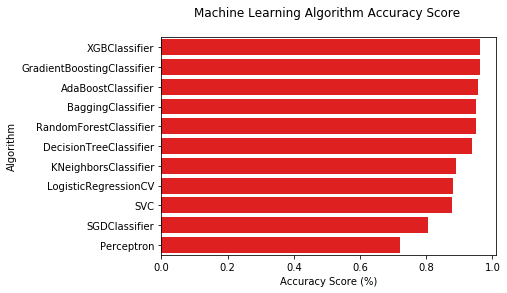

In [13]:
plot_algorithm_performance(algs_compare, 'r')

### Normalization and standartization

In [14]:
numeric_data_x = data_x.copy()

standard_scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()

x = numeric_data_x.values 
x_st_scaled = standard_scaler.fit_transform(x)
x_scaled = min_max_scaler.fit_transform(x_st_scaled)

df = pd.DataFrame(x_scaled)
df.columns = numeric_data_x.columns

for col in df.columns:
  numeric_data_x[col] = df[col].copy()
  numeric_data_x.rename(columns={col:str(col+'_SCALED')}, inplace=True)

numeric_data_x.head()

URL_LENGTH_SCALED  NUMBER_SPECIAL_CHARACTERS_SCALED  CONTENT_LENGTH_SCALED  \
0           0.000000                          0.052632               0.000405   
1           0.000000                          0.026316               0.023237   
2           0.000000                          0.026316               0.000499   
3           0.004292                          0.026316               0.000250   
4           0.004292                          0.026316               0.191201   

   TCP_CONVERSATION_EXCHANGE_SCALED  DIST_REMOTE_TCP_PORT_SCALED  \
0                          0.005863                     0.000000   
1                          0.014238                     0.009887   
2                          0.000000                     0.000000   
3                          0.025963                     0.031073   
4                          0.047739                     0.002825   

   REMOTE_IPS_SCALED  APP_BYTES_SCALED  SOURCE_APP_PACKETS_SCALED  \
0           0.117647          0.000296                   0.007513   
1           0.235294          0.000521                   0.014190   
2           0.000000          0.000000                   0.000000   
3           0.176471          0.001613                   0.032554   
4           0.294118          0.001810                   0.050918   

   REMOTE_APP_PACKETS_SCALED  SOURCE_APP_BYTES_SCALED  \
0                   0.007788                 0.000560   
1                   0.014798                 0.000614   
2                   0.000000                 0.000000   
3                   0.028816                 0.009118   
4                   0.048287                 0.063053   

   REMOTE_APP_BYTES_SCALED  APP_PACKETS_SCALED  DNS_QUERY_TIMES_SCALED  
0                 0.000352            0.007513                     0.1  
1                 0.000521            0.014190                     0.0  
2                 0.000000            0.000000                     0.0  
3                 0.001854            0.032554                     0.4  
4                 0.001941            0.050918                     0.2

In [15]:
algs_compare = compare_algorithm_performance(numeric_data_x, data_y, algs, cv_split)
algs_compare

Algorithm  \
10               XGBClassifier   
2   GradientBoostingClassifier   
1            BaggingClassifier   
0           AdaBoostClassifier   
3       RandomForestClassifier   
9       DecisionTreeClassifier   
7         KNeighborsClassifier   
4         LogisticRegressionCV   
5                SGDClassifier   
8                          SVC   
6                   Perceptron   

                                 Algorithm Parameters Training Time  \
10  {'base_score': 0.5, 'booster': 'gbtree', 'cols...     0.0883015   
2   {'criterion': 'friedman_mse', 'init': None, 'l...       0.19245   
1   {'base_estimator': None, 'bootstrap': True, 'b...     0.0582691   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...       0.11313   
3   {'bootstrap': True, 'class_weight': None, 'cri...     0.0227268   
9   {'class_weight': None, 'criterion': 'gini', 'm...    0.00607708   
7   {'algorithm': 'auto', 'leaf_size': 30, 'metric...    0.00333805   
4   {'Cs': 10, 'class_weight': None, 'cv': 'warn',...      0.963036   
5   {'alpha': 0.0001, 'average': False, 'class_wei...     0.0134183   
8   {'C': 1.0, 'cache_size': 200, 'class_weight': ...      0.128795   
6   {'alpha': 0.0001, 'class_weight': None, 'early...     0.0033345   

   Testing Time Testing Average Accuracy  
10    0.0029115                 0.963551  
2    0.00363541                 0.962617  
1    0.00674033                 0.955701  
0     0.0117444                 0.955327  
3    0.00473588                 0.952897  
9    0.00115731                 0.940374  
7     0.0268389                 0.931028  
4    0.00237257                 0.899626  
5    0.00206597                  0.87757  
8    0.00753226                 0.876262  
6    0.00115514                  0.79514

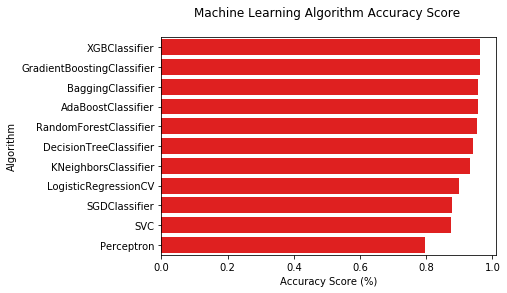

In [16]:
plot_algorithm_performance(algs_compare, 'r')

Some algorithms improved their performance.

In [17]:
scaled_data = cleaned_data.copy()

for col in df.columns:
  scaled_data[col] = df[col].copy()
  scaled_data.rename(columns={col:str(col+'_SCALED')}, inplace=True)

scaled_data.head()

URL  URL_LENGTH_SCALED  NUMBER_SPECIAL_CHARACTERS_SCALED     CHARSET  \
0   M0_109           0.000000                          0.052632  iso-8859-1   
1  B0_2314           0.000000                          0.026316       UTF-8   
2   B0_911           0.000000                          0.026316    us-ascii   
3   B0_113           0.004292                          0.026316  ISO-8859-1   
4   B0_403           0.004292                          0.026316       UTF-8   

                  SERVER  CONTENT_LENGTH_SCALED WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx               0.000405          None           None   
1          Apache/2.4.10               0.023237          None           None   
2  Microsoft-HTTPAPI/2.0               0.000499          None           None   
3                  nginx               0.000250            US             AK   
4                   None               0.191201            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT_SCALED  \
0  10/10/2015 18:21               None  ...                     0.000000   
1              None               None  ...                     0.009887   
2              None               None  ...                     0.000000   
3    7/10/1997 4:00    12/09/2013 0:45  ...                     0.031073   
4   12/05/1996 0:00    11/04/2017 0:00  ...                     0.002825   

   REMOTE_IPS_SCALED  APP_BYTES_SCALED  SOURCE_APP_PACKETS_SCALED  \
0           0.117647          0.000296                   0.007513   
1           0.235294          0.000521                   0.014190   
2           0.000000          0.000000                   0.000000   
3           0.176471          0.001613                   0.032554   
4           0.294118          0.001810                   0.050918   

   REMOTE_APP_PACKETS_SCALED  SOURCE_APP_BYTES_SCALED  \
0                   0.007788                 0.000560   
1                   0.014798                 0.000614   
2                   0.000000                 0.000000   
3                   0.028816                 0.009118   
4                   0.048287                 0.063053   

   REMOTE_APP_BYTES_SCALED  APP_PACKETS_SCALED  DNS_QUERY_TIMES_SCALED  Type  
0                 0.000352            0.007513                     0.1     1  
1                 0.000521            0.014190                     0.0     0  
2                 0.000000            0.000000                     0.0     0  
3                 0.001854            0.032554                     0.4     0  
4                 0.001941            0.050918                     0.2     0  

[5 rows x 21 columns]

### Dates conversion

In [18]:
data = scaled_data.copy()

* **WHOIS_REGDATE**

In [19]:
for idx, regdate in enumerate(data.WHOIS_REGDATE):
  if regdate == 'None':
    data.at[idx, 'WHOIS_REGDATE'] = None
  else:
    try:
        datetimeObj = datetime.strptime(regdate, '%d/%m/%Y %H:%M')
        data.at[idx, 'WHOIS_REGDATE'] = datetime.timestamp(datetimeObj)
    except ValueError:
        data.at[idx, 'WHOIS_REGDATE'] = None

bool_series = pd.notnull(data.WHOIS_REGDATE) 
notnull_dates = np.array(data.WHOIS_REGDATE[bool_series])
norm_notnull_dates = preprocessing.normalize([notnull_dates])[0]
notnull_idx = np.where(bool_series)[0]

for i in range(len(notnull_idx)):
  idx = notnull_idx[i]
  data.at[idx, 'WHOIS_REGDATE'] = norm_notnull_dates[i]

avg_val = np.average(norm_notnull_dates)

for idx, regdate in enumerate(data.WHOIS_REGDATE):
  if regdate == None:
    data.at[idx, 'WHOIS_REGDATE'] = avg_val

data = data.rename(columns={'WHOIS_REGDATE': 'WHOIS_REGDATE_NORM'})
data.WHOIS_REGDATE_NORM = data.WHOIS_REGDATE_NORM.apply(pd.to_numeric) 
print(data.WHOIS_REGDATE_NORM.head())

0    0.034584
1    0.024320
2    0.024320
3    0.020978
4    0.019916
Name: WHOIS_REGDATE_NORM, dtype: float64


* **WHOIS_UPDATED_DATE**

In [20]:
for idx, upddate in enumerate(data.WHOIS_UPDATED_DATE):
  if upddate == 'None':
    data.at[idx, 'WHOIS_UPDATED_DATE'] = None
  else:
    try:
        datetimeObj = datetime.strptime(upddate, '%d/%m/%Y %H:%M')
        data.at[idx, 'WHOIS_UPDATED_DATE'] = datetime.timestamp(datetimeObj)
    except ValueError:
        data.at[idx, 'WHOIS_UPDATED_DATE'] = None

bool_series = pd.notnull(data.WHOIS_UPDATED_DATE) 
notnull_dates = np.array(data.WHOIS_UPDATED_DATE[bool_series])
norm_notnull_dates = preprocessing.normalize([notnull_dates])[0]
notnull_idx = np.where(bool_series)[0]

for i in range(len(notnull_idx)):
  idx = notnull_idx[i]
  data.at[idx, 'WHOIS_UPDATED_DATE'] = norm_notnull_dates[i]

avg_val = np.average(norm_notnull_dates)

for idx, upddate in enumerate(data.WHOIS_UPDATED_DATE):
  if upddate == None:
    data.at[idx, 'WHOIS_UPDATED_DATE'] = avg_val

data = data.rename(columns={'WHOIS_UPDATED_DATE': 'WHOIS_UPDATED_DATE_NORM'})
data.WHOIS_UPDATED_DATE_NORM = data.WHOIS_UPDATED_DATE_NORM.apply(pd.to_numeric) 
print(data.WHOIS_UPDATED_DATE_NORM.head())

0    0.024709
1    0.024709
2    0.024709
3    0.023337
4    0.025248
Name: WHOIS_UPDATED_DATE_NORM, dtype: float64


In [21]:
scaled_data = data.copy()
scaled_data.head()

URL  URL_LENGTH_SCALED  NUMBER_SPECIAL_CHARACTERS_SCALED     CHARSET  \
0   M0_109           0.000000                          0.052632  iso-8859-1   
1  B0_2314           0.000000                          0.026316       UTF-8   
2   B0_911           0.000000                          0.026316    us-ascii   
3   B0_113           0.004292                          0.026316  ISO-8859-1   
4   B0_403           0.004292                          0.026316       UTF-8   

                  SERVER  CONTENT_LENGTH_SCALED WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx               0.000405          None           None   
1          Apache/2.4.10               0.023237          None           None   
2  Microsoft-HTTPAPI/2.0               0.000499          None           None   
3                  nginx               0.000250            US             AK   
4                   None               0.191201            US             TX   

   WHOIS_REGDATE_NORM  WHOIS_UPDATED_DATE_NORM  ...  \
0            0.034584                 0.024709  ...   
1            0.024320                 0.024709  ...   
2            0.024320                 0.024709  ...   
3            0.020978                 0.023337  ...   
4            0.019916                 0.025248  ...   

   DIST_REMOTE_TCP_PORT_SCALED  REMOTE_IPS_SCALED  APP_BYTES_SCALED  \
0                     0.000000           0.117647          0.000296   
1                     0.009887           0.235294          0.000521   
2                     0.000000           0.000000          0.000000   
3                     0.031073           0.176471          0.001613   
4                     0.002825           0.294118          0.001810   

   SOURCE_APP_PACKETS_SCALED  REMOTE_APP_PACKETS_SCALED  \
0                   0.007513                   0.007788   
1                   0.014190                   0.014798   
2                   0.000000                   0.000000   
3                   0.032554                   0.028816   
4                   0.050918                   0.048287   

   SOURCE_APP_BYTES_SCALED  REMOTE_APP_BYTES_SCALED  APP_PACKETS_SCALED  \
0                 0.000560                 0.000352            0.007513   
1                 0.000614                 0.000521            0.014190   
2                 0.000000                 0.000000            0.000000   
3                 0.009118                 0.001854            0.032554   
4                 0.063053                 0.001941            0.050918   

   DNS_QUERY_TIMES_SCALED  Type  
0                     0.1     1  
1                     0.0     0  
2                     0.0     0  
3                     0.4     0  
4                     0.2     0  

[5 rows x 21 columns]

Try with dates columns.

In [22]:
numeric_data = scaled_data.select_dtypes(exclude=['object']).copy()

col_filter = [col for col in numeric_data if col != "Type"]
data_x = numeric_data[col_filter].copy()
data_y = numeric_data.Type.copy()

In [23]:
algs_compare = compare_algorithm_performance(data_x, data_y, algs, cv_split)
algs_compare

Algorithm  \
2   GradientBoostingClassifier   
10               XGBClassifier   
0           AdaBoostClassifier   
1            BaggingClassifier   
3       RandomForestClassifier   
9       DecisionTreeClassifier   
7         KNeighborsClassifier   
4         LogisticRegressionCV   
5                SGDClassifier   
8                          SVC   
6                   Perceptron   

                                 Algorithm Parameters Training Time  \
2   {'criterion': 'friedman_mse', 'init': None, 'l...      0.159204   
10  {'base_score': 0.5, 'booster': 'gbtree', 'cols...      0.101297   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...      0.118506   
1   {'base_estimator': None, 'bootstrap': True, 'b...     0.0418552   
3   {'bootstrap': True, 'class_weight': None, 'cri...     0.0172715   
9   {'class_weight': None, 'criterion': 'gini', 'm...    0.00705705   
7   {'algorithm': 'auto', 'leaf_size': 30, 'metric...    0.00291538   
4   {'Cs': 10, 'class_weight': None, 'cv': 'warn',...      0.732861   
5   {'alpha': 0.0001, 'average': False, 'class_wei...     0.0104001   
8   {'C': 1.0, 'cache_size': 200, 'class_weight': ...      0.128357   
6   {'alpha': 0.0001, 'class_weight': None, 'early...    0.00337324   

   Testing Time Testing Average Accuracy  
2    0.00253377                 0.965607  
10   0.00295522                 0.962056  
0     0.0107818                 0.958879  
1    0.00308974                  0.95757  
3    0.00264957                 0.955701  
9    0.00119724                 0.936075  
7     0.0223811                 0.930467  
4    0.00248907                 0.919065  
5    0.00193174                 0.876262  
8    0.00792012                 0.876262  
6    0.00108614                 0.778505

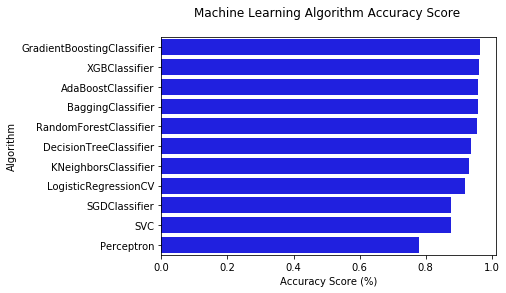

In [24]:
plot_algorithm_performance(algs_compare, 'b')

## 4. Feature selection and engineering

In [25]:
data = scaled_data.copy()

### Feature selection of categorical values

There are still some null values in the dataset: some categorical values may have None values as strings ('None'). <br>
Some categorical features have different formats. <br>
I will go through all the columns one by one.

In [26]:
categ_columns = list(['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO'])
 
for col in categ_columns: 
  print(f'Number of unique values of {col} feature: {len(np.unique(data[col]))}')

Number of unique values of CHARSET feature: 9
Number of unique values of SERVER feature: 240
Number of unique values of WHOIS_COUNTRY feature: 49
Number of unique values of WHOIS_STATEPRO feature: 182


* **URL**

In [27]:
print(f'Number of unique values of URL feature: {len(np.unique(data.URL))}')

Number of unique values of URL feature: 1781


URL features are completely unique, so the column won't be useful for the further analysis and should be dropped.

In [28]:
data.drop('URL', axis=1, inplace = True)

In [29]:
data.head()

URL_LENGTH_SCALED  NUMBER_SPECIAL_CHARACTERS_SCALED     CHARSET  \
0           0.000000                          0.052632  iso-8859-1   
1           0.000000                          0.026316       UTF-8   
2           0.000000                          0.026316    us-ascii   
3           0.004292                          0.026316  ISO-8859-1   
4           0.004292                          0.026316       UTF-8   

                  SERVER  CONTENT_LENGTH_SCALED WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx               0.000405          None           None   
1          Apache/2.4.10               0.023237          None           None   
2  Microsoft-HTTPAPI/2.0               0.000499          None           None   
3                  nginx               0.000250            US             AK   
4                   None               0.191201            US             TX   

   WHOIS_REGDATE_NORM  WHOIS_UPDATED_DATE_NORM  \
0            0.034584                 0.024709   
1            0.024320                 0.024709   
2            0.024320                 0.024709   
3            0.020978                 0.023337   
4            0.019916                 0.025248   

   TCP_CONVERSATION_EXCHANGE_SCALED  DIST_REMOTE_TCP_PORT_SCALED  \
0                          0.005863                     0.000000   
1                          0.014238                     0.009887   
2                          0.000000                     0.000000   
3                          0.025963                     0.031073   
4                          0.047739                     0.002825   

   REMOTE_IPS_SCALED  APP_BYTES_SCALED  SOURCE_APP_PACKETS_SCALED  \
0           0.117647          0.000296                   0.007513   
1           0.235294          0.000521                   0.014190   
2           0.000000          0.000000                   0.000000   
3           0.176471          0.001613                   0.032554   
4           0.294118          0.001810                   0.050918   

   REMOTE_APP_PACKETS_SCALED  SOURCE_APP_BYTES_SCALED  \
0                   0.007788                 0.000560   
1                   0.014798                 0.000614   
2                   0.000000                 0.000000   
3                   0.028816                 0.009118   
4                   0.048287                 0.063053   

   REMOTE_APP_BYTES_SCALED  APP_PACKETS_SCALED  DNS_QUERY_TIMES_SCALED  Type  
0                 0.000352            0.007513                     0.1     1  
1                 0.000521            0.014190                     0.0     0  
2                 0.000000            0.000000                     0.0     0  
3                 0.001854            0.032554                     0.4     0  
4                 0.001941            0.050918                     0.2     0

* **SERVER**

In [30]:
data['SERVER'].value_counts()

Apache                                                                                                                386
nginx                                                                                                                 211
None                                                                                                                  175
Microsoft-HTTPAPI/2.0                                                                                                 113
cloudflare-nginx                                                                                                       94
Microsoft-IIS/7.5                                                                                                      51
GSE                                                                                                                    49
Server                                                                                                                 49
YouTubeFrontEnd         

There are lots of different types of servers, and not all of the servers have a full name. 
Apache, nginx, Microsoft, and mvXXXX.codfw.wmnet types have the largest amounts of values, so it is suggested for the ones that have these names in their names to be renamed.

In [31]:
most_common_servers = ['Apache', 'nginx', 'Microsoft', 'codfw.wmnet']

for idx, server in enumerate(data.SERVER):
  for server_name in most_common_servers:
    if server_name.lower() in server.lower():
      data.at[idx, 'SERVER'] = server_name
      
print(data['SERVER'].value_counts())

Apache                                                             643
nginx                                                              436
Microsoft                                                          198
None                                                               175
codfw.wmnet                                                         61
Server                                                              49
GSE                                                                 49
YouTubeFrontEnd                                                     42
ATS                                                                 30
Varnish                                                              7
LiteSpeed                                                            6
Jetty(9.0.z-SNAPSHOT)                                                4
AmazonS3                                                             4
ebay server                                                          4
openre

There are still quite many unique and none values. So I took top 8 most frequently occuring servers, and others including None values were renamed to Other.

In [32]:
most_freq_servers = list(data['SERVER'].value_counts()[:9].index) # 8 servers + None
most_freq_servers.remove('None')
print(most_freq_servers)

for idx, server in enumerate(data.SERVER):
  if most_freq_servers.count(server) == 0:
    data.at[idx, 'SERVER'] = 'Other server'
    
print(data['SERVER'].value_counts())

['Apache', 'nginx', 'Microsoft', 'codfw.wmnet', 'Server', 'GSE', 'YouTubeFrontEnd', 'ATS']
Apache             643
nginx              436
Other server       273
Microsoft          198
codfw.wmnet         61
GSE                 49
Server              49
YouTubeFrontEnd     42
ATS                 30
Name: SERVER, dtype: int64


* **CHARSET**

In [33]:
print(np.unique(data['CHARSET']))
print(data['CHARSET'].value_counts())

['ISO-8859' 'ISO-8859-1' 'None' 'UTF-8' 'iso-8859-1' 'us-ascii' 'utf-8'
 'windows-1251' 'windows-1252']
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
ISO-8859          1
windows-1252      1
windows-1251      1
Name: CHARSET, dtype: int64


There are the following issues:
* different capitalization of the same values
* None as strings
* ISO-8859-1 and ISO-8859 are of the same standard

So the entries will be corrected with the appropriate values.

In [34]:
for idx, charset in enumerate(data.CHARSET):
  data.at[idx, 'CHARSET'] = charset.upper()
  if data.at[idx, 'CHARSET'] == 'NONE':
    data.at[idx, 'CHARSET'] = None
  elif data.at[idx, 'CHARSET'] == 'ISO-8859-1':
    data.at[idx, 'CHARSET'] = 'ISO-8859'

data = data.interpolate()
data = data.dropna(axis=0)
data.index = range(len(data))
print(np.unique(data['CHARSET']))
print(data['CHARSET'].value_counts())

['ISO-8859' 'US-ASCII' 'UTF-8' 'WINDOWS-1251' 'WINDOWS-1252']
UTF-8           1055
ISO-8859         562
US-ASCII         155
WINDOWS-1251       1
WINDOWS-1252       1
Name: CHARSET, dtype: int64


* **WHOIS_COUNTRY**

In [35]:
print(data['WHOIS_COUNTRY'].value_counts())

US                1097
None               306
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
IN                  10
UK                  10
FR                   9
CN                   9
CZ                   9
CH                   6
NL                   6
[u'GB'; u'UK']       5
KR                   5
AT                   4
BS                   4
PH                   4
ru                   4
BE                   3
KY                   3
DE                   3
HK                   3
us                   3
TR                   3
SE                   3
SC                   3
IL                   2
UA                   2
NO                   2
UY                   2
KG                   2
RU                   2
Cyprus               2
BR                   2
SI                   2
AE                   1
se                   1
IE                   1
TH                   1
IT                   1
United King

Most countries are encoded with 2 letters, so full names should be corrected. Capitalization should be treated as well.

In [36]:
for idx, country in enumerate(data.WHOIS_COUNTRY):
  data.at[idx, 'WHOIS_COUNTRY'] = country.upper()
  if country.upper() == "[U'GB'; U'UK']" or country.upper() == "UNITED KINGDOM":
    data.at[idx, 'WHOIS_COUNTRY'] = 'UK'
  elif country.upper() == "CYPRUS":
    data.at[idx, 'WHOIS_COUNTRY'] = 'CY'
  elif country.upper() == 'NONE':
    data.at[idx, 'WHOIS_COUNTRY'] = 'Other country'
  
print(data['WHOIS_COUNTRY'].value_counts())

US               1100
Other country     306
CA                 84
ES                 63
AU                 35
PA                 21
GB                 19
UK                 16
JP                 11
IN                 10
FR                  9
CZ                  9
CN                  9
NL                  6
CH                  6
RU                  6
KR                  5
AT                  4
BS                  4
SE                  4
PH                  4
KY                  3
BE                  3
HK                  3
DE                  3
SC                  3
TR                  3
NO                  2
CY                  2
IL                  2
UA                  2
UY                  2
KG                  2
BR                  2
SI                  2
AE                  1
IE                  1
TH                  1
IT                  1
LV                  1
BY                  1
LU                  1
PK                  1
UG                  1
Name: WHOIS_COUNTRY, dtype: int6

In [37]:
most_freq_countries = list(data['WHOIS_COUNTRY'].value_counts()[:13].index)

for idx, country in enumerate(data.WHOIS_COUNTRY):
  if most_freq_countries.count(country) == 0:
    data.at[idx, 'WHOIS_COUNTRY'] = 'Other country'
    
print(data['WHOIS_COUNTRY'].value_counts())

US               1100
Other country     388
CA                 84
ES                 63
AU                 35
PA                 21
GB                 19
UK                 16
JP                 11
IN                 10
CZ                  9
CN                  9
FR                  9
Name: WHOIS_COUNTRY, dtype: int64


* **WHOIS_STATEPRO**

In [38]:
print(data['WHOIS_STATEPRO'].value_counts())

CA                 370
None               362
NY                  75
WA                  65
Barcelona           62
FL                  61
Arizona             58
California          57
ON                  45
NV                  30
UT                  29
CO                  24
PA                  23
MA                  22
PANAMA              19
IL                  19
MO                  15
Ohio                15
Queensland          14
NJ                  14
Utah                13
VA                  10
Washington          10
New York            10
Quebec               9
TX                   9
Texas                9
Illinois             8
GA                   8
DC                   8
                  ... 
Alicante             1
Andhra Pradesh       1
Vi                   1
AK                   1
NC                   1
NEW SOUTH WALES      1
bangkok              1
Maharashtra          1
UTTAR PRADESH        1
CO. DUBLIN           1
Utr                  1
HANTS                1
kireka     

This column has a lot of none values, formatting of the values is poor, and there should be a strong correlation between a country and state (different countries may be represented with 1-2 states).
Since information about different countries is unbalanced, it was decided to drop the column at all.

In [39]:
data.drop('WHOIS_STATEPRO', axis=1, inplace = True)

In [40]:
data.head()

URL_LENGTH_SCALED  NUMBER_SPECIAL_CHARACTERS_SCALED   CHARSET  \
0           0.000000                          0.052632  ISO-8859   
1           0.000000                          0.026316     UTF-8   
2           0.000000                          0.026316  US-ASCII   
3           0.004292                          0.026316  ISO-8859   
4           0.004292                          0.026316     UTF-8   

         SERVER  CONTENT_LENGTH_SCALED  WHOIS_COUNTRY  WHOIS_REGDATE_NORM  \
0         nginx               0.000405  Other country            0.034584   
1        Apache               0.023237  Other country            0.024320   
2     Microsoft               0.000499  Other country            0.024320   
3         nginx               0.000250             US            0.020978   
4  Other server               0.191201             US            0.019916   

   WHOIS_UPDATED_DATE_NORM  TCP_CONVERSATION_EXCHANGE_SCALED  \
0                 0.024709                          0.005863   
1                 0.024709                          0.014238   
2                 0.024709                          0.000000   
3                 0.023337                          0.025963   
4                 0.025248                          0.047739   

   DIST_REMOTE_TCP_PORT_SCALED  REMOTE_IPS_SCALED  APP_BYTES_SCALED  \
0                     0.000000           0.117647          0.000296   
1                     0.009887           0.235294          0.000521   
2                     0.000000           0.000000          0.000000   
3                     0.031073           0.176471          0.001613   
4                     0.002825           0.294118          0.001810   

   SOURCE_APP_PACKETS_SCALED  REMOTE_APP_PACKETS_SCALED  \
0                   0.007513                   0.007788   
1                   0.014190                   0.014798   
2                   0.000000                   0.000000   
3                   0.032554                   0.028816   
4                   0.050918                   0.048287   

   SOURCE_APP_BYTES_SCALED  REMOTE_APP_BYTES_SCALED  APP_PACKETS_SCALED  \
0                 0.000560                 0.000352            0.007513   
1                 0.000614                 0.000521            0.014190   
2                 0.000000                 0.000000            0.000000   
3                 0.009118                 0.001854            0.032554   
4                 0.063053                 0.001941            0.050918   

   DNS_QUERY_TIMES_SCALED  Type  
0                     0.1     1  
1                     0.0     0  
2                     0.0     0  
3                     0.4     0  
4                     0.2     0

### Feature engineering for categorical features

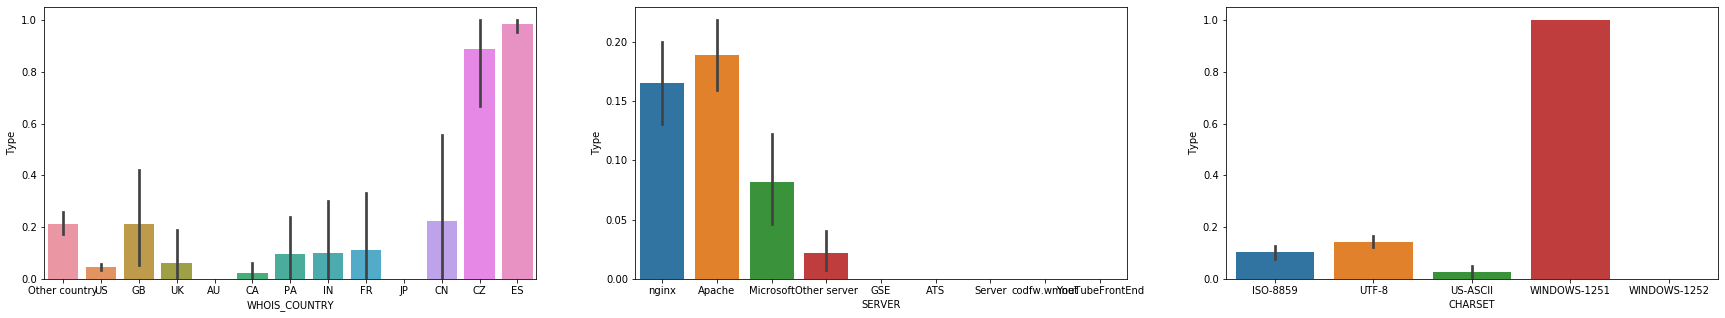

In [41]:
#graph individual features by type
fig = plt.figure(figsize=[30,5])

plt.subplot(131)
sns.barplot(x = 'WHOIS_COUNTRY', y = 'Type', data=data)

plt.subplot(132)
sns.barplot(x = 'SERVER', y = 'Type', data=data)

plt.subplot(133)
sns.barplot(x = 'CHARSET', y = 'Type', data=data)

plt.show()

In [42]:
dataset_with_dummies = pd.get_dummies(data,prefix_sep='--')
dataset_with_dummies.head()

URL_LENGTH_SCALED  NUMBER_SPECIAL_CHARACTERS_SCALED  CONTENT_LENGTH_SCALED  \
0           0.000000                          0.052632               0.000405   
1           0.000000                          0.026316               0.023237   
2           0.000000                          0.026316               0.000499   
3           0.004292                          0.026316               0.000250   
4           0.004292                          0.026316               0.191201   

   WHOIS_REGDATE_NORM  WHOIS_UPDATED_DATE_NORM  \
0            0.034584                 0.024709   
1            0.024320                 0.024709   
2            0.024320                 0.024709   
3            0.020978                 0.023337   
4            0.019916                 0.025248   

   TCP_CONVERSATION_EXCHANGE_SCALED  DIST_REMOTE_TCP_PORT_SCALED  \
0                          0.005863                     0.000000   
1                          0.014238                     0.009887   
2                          0.000000                     0.000000   
3                          0.025963                     0.031073   
4                          0.047739                     0.002825   

   REMOTE_IPS_SCALED  APP_BYTES_SCALED  SOURCE_APP_PACKETS_SCALED  ...  \
0           0.117647          0.000296                   0.007513  ...   
1           0.235294          0.000521                   0.014190  ...   
2           0.000000          0.000000                   0.000000  ...   
3           0.176471          0.001613                   0.032554  ...   
4           0.294118          0.001810                   0.050918  ...   

   WHOIS_COUNTRY--CZ  WHOIS_COUNTRY--ES  WHOIS_COUNTRY--FR  WHOIS_COUNTRY--GB  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   WHOIS_COUNTRY--IN  WHOIS_COUNTRY--JP  WHOIS_COUNTRY--Other country  \
0                  0                  0                             1   
1                  0                  0                             1   
2                  0                  0                             1   
3                  0                  0                             0   
4                  0                  0                             0   

   WHOIS_COUNTRY--PA  WHOIS_COUNTRY--UK  WHOIS_COUNTRY--US  
0                  0                  0                  0  
1                  0                  0                  0  
2                  0                  0                  0  
3                  0                  0                  1  
4                  0                  0                  1  

[5 rows x 43 columns]

In [43]:
numeric_data = dataset_with_dummies.select_dtypes(exclude=['object']).copy()

col_filter = [col for col in numeric_data if col != "Type"]
data_x = numeric_data[col_filter].copy()
data_y = numeric_data.Type.copy()

In [44]:
algs_compare = compare_algorithm_performance(data_x, data_y, algs, cv_split)
algs_compare

Algorithm  \
10               XGBClassifier   
2   GradientBoostingClassifier   
0           AdaBoostClassifier   
1            BaggingClassifier   
3       RandomForestClassifier   
4         LogisticRegressionCV   
9       DecisionTreeClassifier   
7         KNeighborsClassifier   
5                SGDClassifier   
8                          SVC   
6                   Perceptron   

                                 Algorithm Parameters Training Time  \
10  {'base_score': 0.5, 'booster': 'gbtree', 'cols...      0.162699   
2   {'criterion': 'friedman_mse', 'init': None, 'l...       0.22407   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...      0.133873   
1   {'base_estimator': None, 'bootstrap': True, 'b...     0.0586744   
3   {'bootstrap': True, 'class_weight': None, 'cri...     0.0180882   
4   {'Cs': 10, 'class_weight': None, 'cv': 'warn',...      0.916995   
9   {'class_weight': None, 'criterion': 'gini', 'm...     0.0101197   
7   {'algorithm': 'auto', 'leaf_size': 30, 'metric...    0.00488217   
5   {'alpha': 0.0001, 'average': False, 'class_wei...     0.0162127   
8   {'C': 1.0, 'cache_size': 200, 'class_weight': ...      0.209201   
6   {'alpha': 0.0001, 'class_weight': None, 'early...     0.0118048   

   Testing Time Testing Average Accuracy  
10   0.00352237                 0.961726  
2    0.00266545                 0.960976  
0     0.0123209                 0.955535  
1    0.00364261                 0.954409  
3    0.00286522                 0.954221  
4    0.00260549                 0.933771  
9    0.00143621                 0.933396  
7     0.0491351                 0.930582  
5    0.00257208                 0.913133  
8     0.0129347                 0.911445  
6    0.00253704                 0.884991

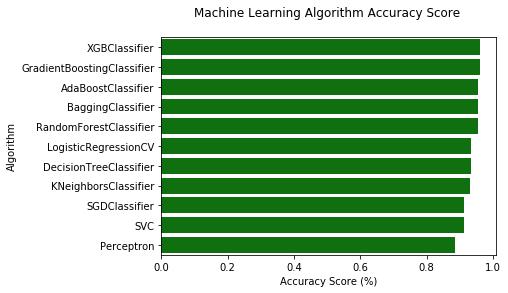

In [45]:
plot_algorithm_performance(algs_compare, 'g')

In [46]:
prep_data = dataset_with_dummies.copy()

### Feature selection of numerical features

In [47]:
data = prep_data.copy()

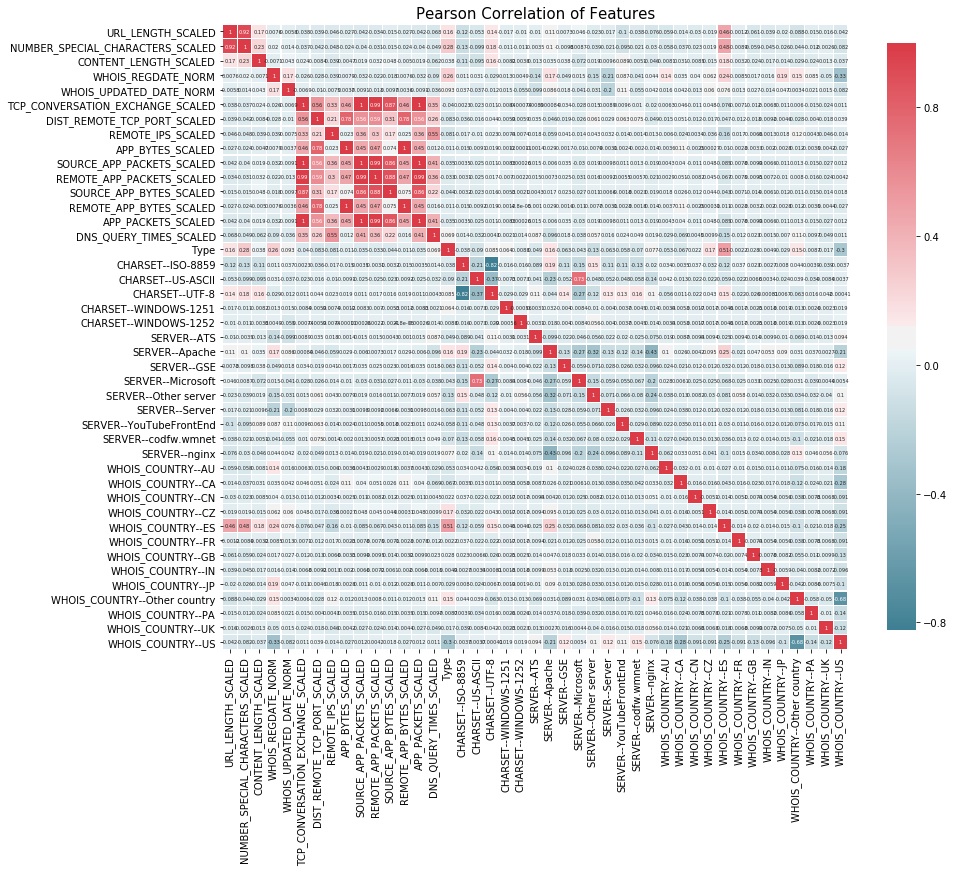

In [48]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 5 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

There are several highly correlated variables.


In [49]:
corr_matrix = data.corr()
print("Highly correlated variables:")

threshold = 0.75

m_size = corr_matrix.shape[0]

for i in range(m_size):
  for j in range(i+1, m_size):
    if abs(corr_matrix.iloc[i][j]) >= threshold:
      print(f'{corr_matrix.index[i]} and {corr_matrix.columns[j]}: {corr_matrix.iloc[i][j]}')

Highly correlated variables:
URL_LENGTH_SCALED and NUMBER_SPECIAL_CHARACTERS_SCALED: 0.9179544034822287
TCP_CONVERSATION_EXCHANGE_SCALED and SOURCE_APP_PACKETS_SCALED: 0.9978060359237455
TCP_CONVERSATION_EXCHANGE_SCALED and REMOTE_APP_PACKETS_SCALED: 0.9908704303141486
TCP_CONVERSATION_EXCHANGE_SCALED and SOURCE_APP_BYTES_SCALED: 0.8656464494499769
TCP_CONVERSATION_EXCHANGE_SCALED and APP_PACKETS_SCALED: 0.9978060359237455
DIST_REMOTE_TCP_PORT_SCALED and APP_BYTES_SCALED: 0.7807372351585783
DIST_REMOTE_TCP_PORT_SCALED and REMOTE_APP_BYTES_SCALED: 0.7817027896289656
APP_BYTES_SCALED and REMOTE_APP_BYTES_SCALED: 0.999992017480572
SOURCE_APP_PACKETS_SCALED and REMOTE_APP_PACKETS_SCALED: 0.9893236552035829
SOURCE_APP_PACKETS_SCALED and SOURCE_APP_BYTES_SCALED: 0.8576201572640193
SOURCE_APP_PACKETS_SCALED and APP_PACKETS_SCALED: 1.0
REMOTE_APP_PACKETS_SCALED and SOURCE_APP_BYTES_SCALED: 0.8806003735569606
REMOTE_APP_PACKETS_SCALED and APP_PACKETS_SCALED: 0.9893236552035829
SOURCE_APP_BYTES_

It was decided to leave APP_PACKETS, APP_BYTES and URL_LENGTH.

In [50]:
columns_to_drop = list(['SOURCE_APP_PACKETS_SCALED', 'REMOTE_APP_PACKETS_SCALED', 'TCP_CONVERSATION_EXCHANGE_SCALED', 'REMOTE_APP_BYTES_SCALED', 'NUMBER_SPECIAL_CHARACTERS_SCALED', 'SOURCE_APP_BYTES_SCALED', 'DIST_REMOTE_TCP_PORT_SCALED'])
data.drop(columns_to_drop, axis=1, inplace = True)
data.head()

URL_LENGTH_SCALED  CONTENT_LENGTH_SCALED  WHOIS_REGDATE_NORM  \
0           0.000000               0.000405            0.034584   
1           0.000000               0.023237            0.024320   
2           0.000000               0.000499            0.024320   
3           0.004292               0.000250            0.020978   
4           0.004292               0.191201            0.019916   

   WHOIS_UPDATED_DATE_NORM  REMOTE_IPS_SCALED  APP_BYTES_SCALED  \
0                 0.024709           0.117647          0.000296   
1                 0.024709           0.235294          0.000521   
2                 0.024709           0.000000          0.000000   
3                 0.023337           0.176471          0.001613   
4                 0.025248           0.294118          0.001810   

   APP_PACKETS_SCALED  DNS_QUERY_TIMES_SCALED  Type  CHARSET--ISO-8859  ...  \
0            0.007513                     0.1     1                  1  ...   
1            0.014190                     0.0     0                  0  ...   
2            0.000000                     0.0     0                  0  ...   
3            0.032554                     0.4     0                  1  ...   
4            0.050918                     0.2     0                  0  ...   

   WHOIS_COUNTRY--CZ  WHOIS_COUNTRY--ES  WHOIS_COUNTRY--FR  WHOIS_COUNTRY--GB  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   WHOIS_COUNTRY--IN  WHOIS_COUNTRY--JP  WHOIS_COUNTRY--Other country  \
0                  0                  0                             1   
1                  0                  0                             1   
2                  0                  0                             1   
3                  0                  0                             0   
4                  0                  0                             0   

   WHOIS_COUNTRY--PA  WHOIS_COUNTRY--UK  WHOIS_COUNTRY--US  
0                  0                  0                  0  
1                  0                  0                  0  
2                  0                  0                  0  
3                  0                  0                  1  
4                  0                  0                  1  

[5 rows x 36 columns]

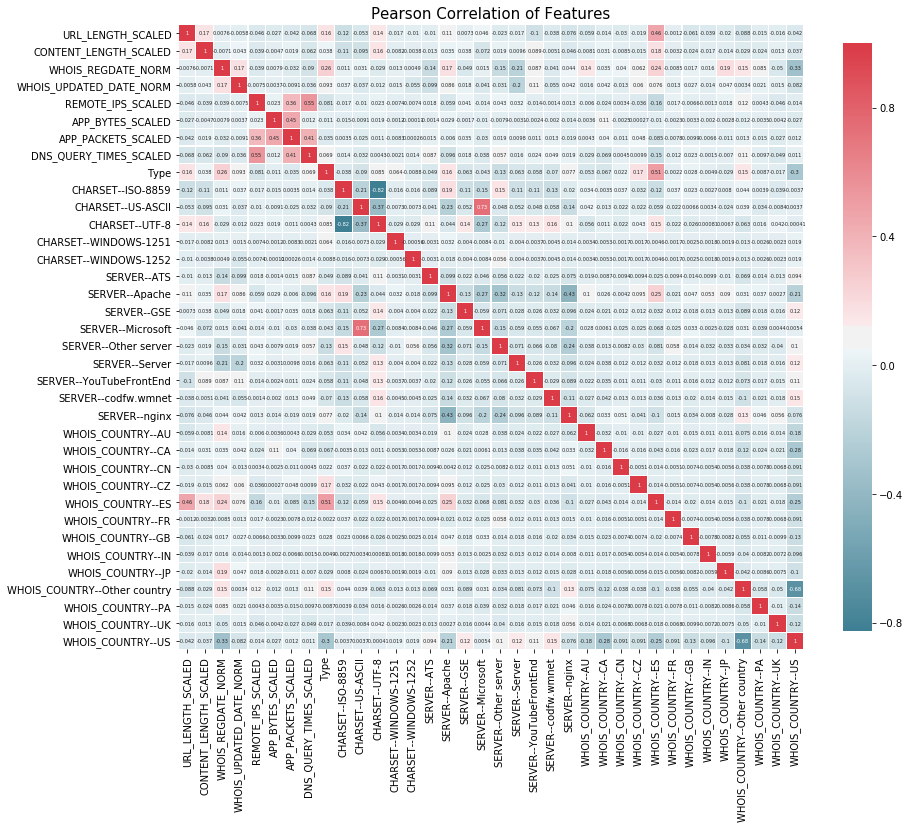

In [51]:
correlation_heatmap(data)

In [52]:
numeric_data = data.copy()

col_filter = [col for col in numeric_data if col != "Type"]
data_x = numeric_data[col_filter].copy()
data_y = numeric_data.Type.copy()

In [53]:
algs_compare = compare_algorithm_performance(data_x, data_y, algs, cv_split)
algs_compare

Algorithm  \
3       RandomForestClassifier   
2   GradientBoostingClassifier   
10               XGBClassifier   
1            BaggingClassifier   
0           AdaBoostClassifier   
7         KNeighborsClassifier   
9       DecisionTreeClassifier   
4         LogisticRegressionCV   
8                          SVC   
5                SGDClassifier   
6                   Perceptron   

                                 Algorithm Parameters Training Time  \
3   {'bootstrap': True, 'class_weight': None, 'cri...     0.0162851   
2   {'criterion': 'friedman_mse', 'init': None, 'l...      0.181008   
10  {'base_score': 0.5, 'booster': 'gbtree', 'cols...       0.13615   
1   {'base_estimator': None, 'bootstrap': True, 'b...     0.0460664   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...      0.111308   
7   {'algorithm': 'auto', 'leaf_size': 30, 'metric...    0.00459301   
9   {'class_weight': None, 'criterion': 'gini', 'm...    0.00736628   
4   {'Cs': 10, 'class_weight': None, 'cv': 'warn',...      0.935217   
8   {'C': 1.0, 'cache_size': 200, 'class_weight': ...      0.190174   
5   {'alpha': 0.0001, 'average': False, 'class_wei...     0.0146078   
6   {'alpha': 0.0001, 'class_weight': None, 'early...    0.00791807   

   Testing Time Testing Average Accuracy  
3    0.00286808                  0.95666  
2    0.00275116                 0.954972  
10   0.00370648                 0.954972  
1    0.00365193                 0.952158  
0     0.0117561                 0.939024  
7     0.0414807                 0.930206  
9     0.0013551                 0.929456  
4     0.0026161                 0.919137  
8      0.011872                 0.911445  
5    0.00250828                 0.907317  
6    0.00243843                 0.852533

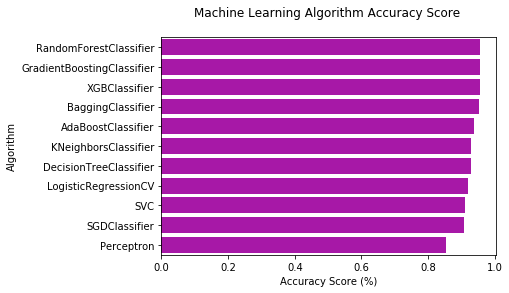

In [54]:
plot_algorithm_performance(algs_compare, 'm')

In [55]:
data_full = prep_data.copy()

## 5. Data exploration

Exploration of the prepared datasets.

In [56]:
data = data_full.copy()

In [57]:
data.describe()

URL_LENGTH_SCALED  NUMBER_SPECIAL_CHARACTERS_SCALED  \
count        1774.000000                       1774.000000   
mean            0.176116                          0.161099   
std             0.118336                          0.119786   
min             0.000000                          0.000000   
25%             0.098712                          0.078947   
50%             0.141631                          0.131579   
75%             0.223176                          0.210526   
max             1.000000                          1.000000   

       CONTENT_LENGTH_SCALED  WHOIS_REGDATE_NORM  WHOIS_UPDATED_DATE_NORM  \
count            1774.000000         1774.000000              1774.000000   
mean                0.020843            0.024330                 0.024708   
std                 0.059276            0.003856                 0.000560   
min                 0.000000            0.015537                 0.020579   
25%                 0.000945            0.021447                 0.024538   
50%                 0.007267            0.024320                 0.024839   
75%                 0.019374            0.026776                 0.025105   
max                 1.000000            0.035724                 0.025275   

       TCP_CONVERSATION_EXCHANGE_SCALED  DIST_REMOTE_TCP_PORT_SCALED  \
count                       1774.000000                  1774.000000   
mean                           0.013625                     0.007720   
std                            0.033979                     0.030839   
min                            0.000000                     0.000000   
25%                            0.000000                     0.000000   
50%                            0.005863                     0.000000   
75%                            0.018425                     0.007062   
max                            1.000000                     1.000000   

       REMOTE_IPS_SCALED  APP_BYTES_SCALED  SOURCE_APP_PACKETS_SCALED  ...  \
count        1774.000000       1774.000000                1774.000000  ...   
mean            0.179919          0.001264                   0.015479  ...   
std             0.199365          0.023768                   0.034804  ...   
min             0.000000          0.000000                   0.000000  ...   
25%             0.000000          0.000000                   0.000000  ...   
50%             0.117647          0.000284                   0.006678  ...   
75%             0.294118          0.000985                   0.021703  ...   
max             1.000000          1.000000                   1.000000  ...   

       WHOIS_COUNTRY--CZ  WHOIS_COUNTRY--ES  WHOIS_COUNTRY--FR  \
count        1774.000000        1774.000000        1774.000000   
mean            0.005073           0.035513           0.005073   
std             0.071066           0.185125           0.071066   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       WHOIS_COUNTRY--GB  WHOIS_COUNTRY--IN  WHOIS_COUNTRY--JP  \
count        1774.000000        1774.000000        1774.000000   
mean            0.010710           0.005637           0.006201   
std             0.102964           0.074889           0.078522   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       WHOIS_COUNTRY--Other country  WHOIS_COUNTRY--PA  WHOIS_COUNTRY--UK  \
count                   1774.000000        1774.000000        1774.000000   
mean                       0.218715           0.011838    

### Dataset parameters

Number of observations: 1774
Number of features: 43
Number of malicious websites: 215
Number of benign websites: 1559


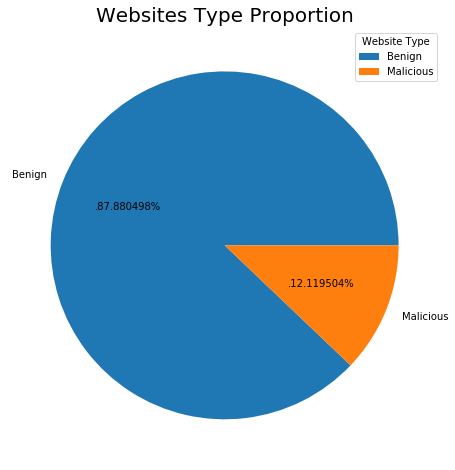

In [58]:
nrow, ncol = data.shape
print(f'Number of observations: {nrow}')
print(f'Number of features: {ncol}')
print(f'Number of malicious websites: {sum(data.Type)}')
print(f'Number of benign websites: {nrow - sum(data.Type)}')

plt.rcParams['figure.figsize'] = (10, 8)

plt.subplot(1, 1, 1)
size = data.Type.value_counts()
labels = 'Benign', 'Malicious'
plt.pie(size, labels = labels, autopct = '.%2f%%')
plt.title('Websites Type Proportion', fontsize = 20)
plt.legend(title="Website Type")

plt.show()

The dataset is unbalanced: the number of malicious websites is much smaller than benign ones.

15


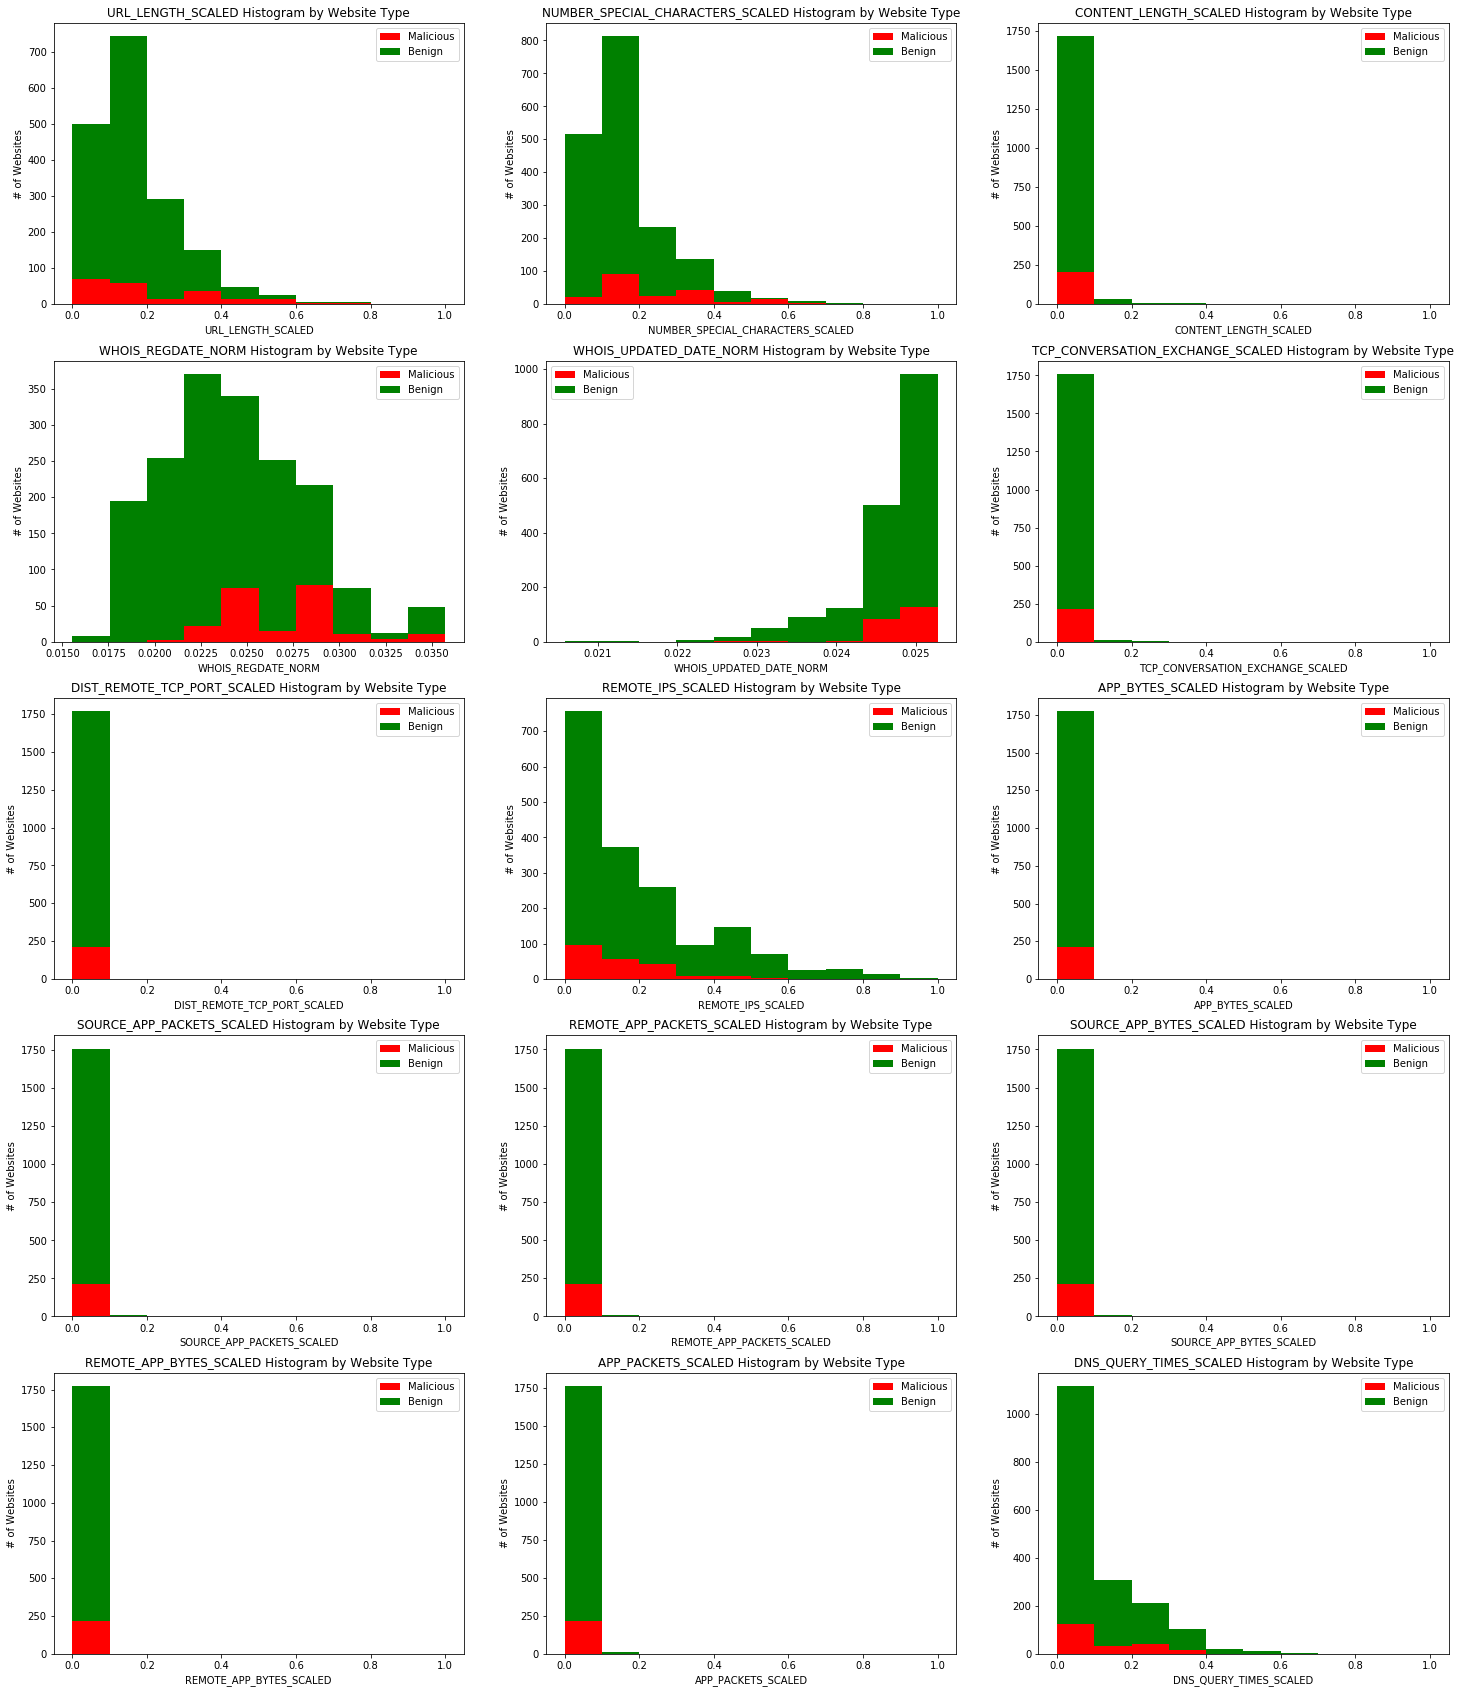

In [59]:
plt.figure(figsize=[25,30])

data = data_full.select_dtypes(exclude=['object']).copy()

col_filter = [col for col in data.columns if len(np.unique(data[col])) > 2] 
numeric_data = data[col_filter]
print(len(numeric_data.columns))

for idx,col in enumerate(numeric_data.columns):
  plt.subplot(5, 3, idx+1)
  plt.hist(x = [numeric_data[data['Type']==1][col], numeric_data[data['Type']==0][col]], stacked=True, color = ['r','g'],label = ['Malicious','Benign'])
  plt.title(f'{col} Histogram by Website Type')
  plt.xlabel(f'{col}')
  plt.ylabel('# of Websites')
  plt.legend()

plt.show()

## 5. Modeling

In [60]:
col_filter = [col for col in data if col != "Type"]
data_x = data[col_filter].copy()
data_y = data.Type.copy()

### Clustering

<Figure size 1512x360 with 0 Axes>

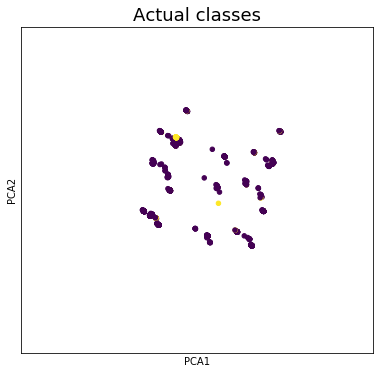

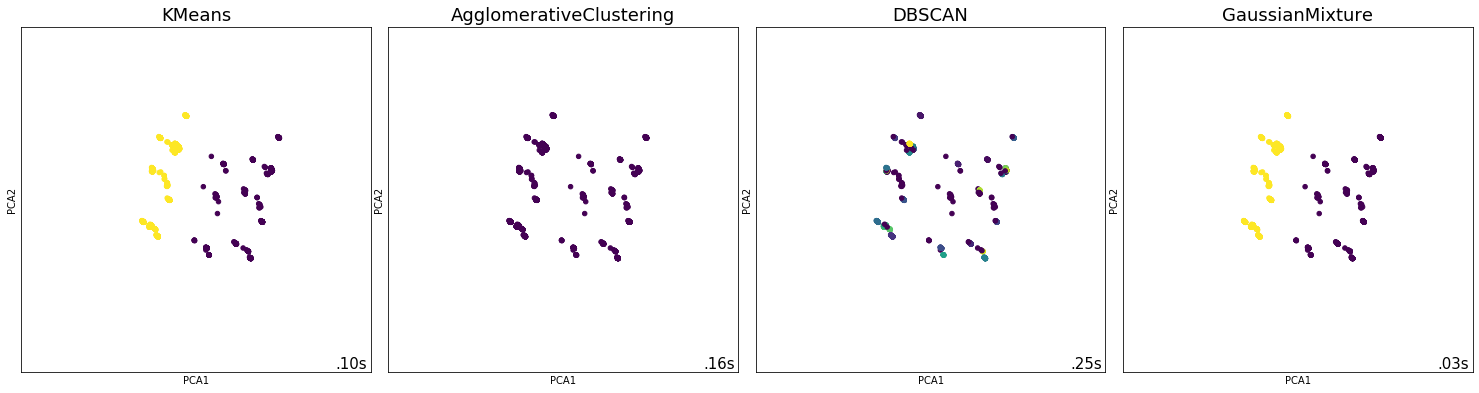

In [61]:
np.random.seed(0)

plt.figure(figsize=(21, 5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

X = data_x
y = data_y

# Principal component analysis
pca = decomposition.PCA(n_components=2)
pca_X = pca.fit(X).transform(X)


# Plot actual classes
plt.figure(figsize=(6.3, 6))
plt.title("Actual classes", size=18)

plt.scatter(pca_X[:, 0], pca_X[:, 1], s=20, c=y)

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.xticks(())
plt.yticks(())

plt.show()

# Clustering algorithms 
kmeans = cluster.KMeans(n_clusters=2, random_state=0) 
dbscan = cluster.DBSCAN(eps=0.3)  
average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=2)    
gmm = mixture.GaussianMixture(
        n_components=2, covariance_type='full')

clustering_algorithms = (
        ('KMeans', kmeans),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('GaussianMixture', gmm)
)

plt.figure(figsize=(21, 5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for name, algorithm in clustering_algorithms:
  
  t0 = time.time()

  algorithm.fit(X)

  t1 = time.time()

  if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(np.int)
  else:
    y_pred = algorithm.predict(X)

  # plot
  plt.subplot(1, len(clustering_algorithms), plot_num)
  plt.title(name, size=18)

  plt.scatter(pca_X[:, 0], pca_X[:, 1], s = 20, c=y_pred)

  plt.xlim(-2.5, 2.5)
  plt.ylim(-2.5, 2.5)
  plt.xlabel("PCA1")
  plt.ylabel("PCA2")
  plt.xticks(())
  plt.yticks(())
  plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
  plot_num += 1

plt.show()

### Classification

In [62]:
numeric_data = data_full.copy()

col_filter = [col for col in numeric_data if col != "Type"]
data_x = numeric_data[col_filter].copy()
data_y = numeric_data.Type.copy()

In [63]:
algs_compare = compare_algorithm_performance(data_x, data_y, algs, cv_split)
algs_compare

Algorithm  \
10               XGBClassifier   
2   GradientBoostingClassifier   
0           AdaBoostClassifier   
1            BaggingClassifier   
3       RandomForestClassifier   
9       DecisionTreeClassifier   
4         LogisticRegressionCV   
7         KNeighborsClassifier   
5                SGDClassifier   
8                          SVC   
6                   Perceptron   

                                 Algorithm Parameters Training Time  \
10  {'base_score': 0.5, 'booster': 'gbtree', 'cols...      0.198767   
2   {'criterion': 'friedman_mse', 'init': None, 'l...      0.301959   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...       0.19089   
1   {'base_estimator': None, 'bootstrap': True, 'b...     0.0635566   
3   {'bootstrap': True, 'class_weight': None, 'cri...      0.028765   
9   {'class_weight': None, 'criterion': 'gini', 'm...     0.0122174   
4   {'Cs': 10, 'class_weight': None, 'cv': 'warn',...       1.45176   
7   {'algorithm': 'auto', 'leaf_size': 30, 'metric...    0.00709543   
5   {'alpha': 0.0001, 'average': False, 'class_wei...      0.027143   
8   {'C': 1.0, 'cache_size': 200, 'class_weight': ...      0.231327   
6   {'alpha': 0.0001, 'class_weight': None, 'early...     0.0124888   

   Testing Time Testing Average Accuracy  
10   0.00438559                 0.961726  
2    0.00379562                 0.961163  
0     0.0190263                 0.955535  
1    0.00397601                 0.955159  
3    0.00542071                 0.954409  
9    0.00235994                 0.935835  
4    0.00296221                 0.933771  
7     0.0565033                 0.930582  
5    0.00712364                 0.923452  
8     0.0157461                 0.911445  
6    0.00435472                 0.884991

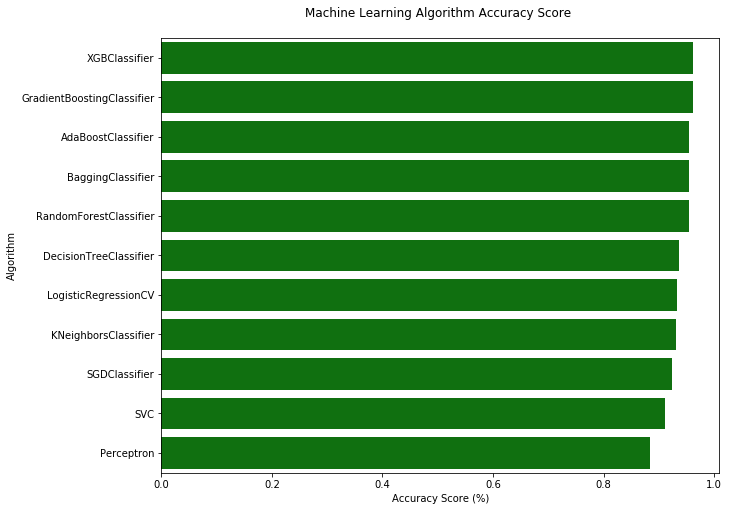

In [64]:
plot_algorithm_performance(algs_compare, 'g')

In [65]:
def compare_predictions(data_x, data_y, algs, cv_split, parameter, param_vals):
  #create table to compare algorithms metrics
  res_columns = [parameter, 'Accuracy', 'Training Time', 'Testing Time']
  res_compare = pd.DataFrame(columns = res_columns)
  for idx, param_val in enumerate(param_vals):
    alg = algs[idx]  
    #score model with cross validation
    #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data_x, data_y, cv  = cv_split)
    res_compare.loc[idx, parameter] = param_val
    res_compare.loc[idx, 'Training Time'] = cv_results['fit_time'].mean()
    res_compare.loc[idx, 'Testing Time'] = cv_results['score_time'].mean()
    res_compare.loc[idx, 'Accuracy'] = cv_results['test_score'].mean()      
    
  res_compare.sort_values(by = ['Accuracy'], ascending = False, inplace = True)
  return res_compare

In [66]:
col_filter = [col for col in data_full if col != "Type"]
data_x = data_full[col_filter].copy()
data_y = data_full.Type.copy()

learning_rates = [pow(10,-i) for i in range(6)]
ns_estimators = [100 * (i+1) for i in range(6)]

**Gradient Boosting Classifier**

In [67]:
algs1 = [ensemble.GradientBoostingClassifier(learning_rate=learning_rate) for learning_rate in learning_rates]
comparison_table1 = compare_predictions(data_x, data_y, algs1, cv_split, 'Learning Rate', learning_rates)
comparison_table1

Learning Rate  Accuracy Training Time Testing Time
0             1  0.960976      0.219359   0.00299704
1           0.1  0.960788      0.293573   0.00391686
2          0.01  0.911445      0.243283   0.00367236
3         0.001  0.875985      0.249806   0.00278394
4        0.0001  0.875985       0.26631   0.00278831
5         1e-05  0.875985      0.248154    0.0025455

In [68]:
algs2 = [ensemble.GradientBoostingClassifier(n_estimators=n_estimators) for n_estimators in ns_estimators]
comparison_table2 = compare_predictions(data_x, data_y, algs2, cv_split, 'Number of Estimators', ns_estimators)
comparison_table2 

Number of Estimators  Accuracy Training Time Testing Time
2                  300  0.962664       0.80575   0.00515678
3                  400  0.962664       1.01687   0.00662544
4                  500  0.962289       1.14981   0.00622337
5                  600  0.962289       1.39406    0.0077034
1                  200  0.961914      0.489851   0.00430229
0                  100  0.961163      0.246532    0.0027693

In [69]:
best_gbc = [ensemble.GradientBoostingClassifier(learning_rate=0.1, n_estimators=300)]
comparison_table3 = compare_predictions(data_x, data_y, best_gbc, cv_split, '-', ['-'])
comparison_table3

-  Accuracy Training Time Testing Time
0  -  0.962852      0.716167   0.00508661

**Bagging Classifier**

In [70]:
algs1 = [ensemble.BaggingClassifier(n_estimators=n_estimators) for n_estimators in ns_estimators]
comparison_table1 = compare_predictions(data_x, data_y, algs1, cv_split, 'Number of Estimators', ns_estimators,)
comparison_table1

Number of Estimators  Accuracy Training Time Testing Time
0                  100   0.95985      0.554472    0.0212529
1                  200  0.958912        1.1362    0.0396451
3                  400  0.958724       2.82901     0.121739
4                  500  0.958724       2.86214     0.102563
5                  600  0.958724       3.24868     0.111354
2                  300  0.958349       1.99799    0.0762009

In [71]:
best_bc = [ensemble.BaggingClassifier(n_estimators=200)]
comparison_table2 = compare_predictions(data_x, data_y, best_bc, cv_split, '-', ['-'])
comparison_table2

-  Accuracy Training Time Testing Time
0  -  0.959287       1.19839    0.0471737

**AdaBoostClassifier**

In [72]:
algs1 = [ensemble.AdaBoostClassifier(learning_rate=learning_rate) for learning_rate in learning_rates]
comparison_table1 = compare_predictions(data_x, data_y, algs1, cv_split, 'Learning Rate', learning_rates)
comparison_table1

Learning Rate  Accuracy Training Time Testing Time
0             1  0.955535      0.134869    0.0122875
1           0.1  0.933396      0.166561    0.0188791
2          0.01  0.911445      0.165304    0.0154427
3         0.001  0.911445      0.139858    0.0122151
4        0.0001  0.911445      0.161365    0.0156323
5         1e-05  0.911445      0.142507    0.0138669

In [73]:
algs2 = [ensemble.AdaBoostClassifier(n_estimators=n_estimators) for n_estimators in ns_estimators]
comparison_table2 = compare_predictions(data_x, data_y, algs2, cv_split, 'Number of Estimators', ns_estimators)
comparison_table2

Number of Estimators  Accuracy Training Time Testing Time
0                  100  0.958537      0.304851    0.0310325
2                  300   0.95591       0.89483    0.0882437
5                  600  0.955347       1.94338     0.160323
4                  500  0.955159       1.65392      0.12793
3                  400  0.954409       1.22599     0.105385
1                  200  0.954034      0.617836    0.0560202

In [74]:
best_adac = [ensemble.AdaBoostClassifier(learning_rate=1, n_estimators=100)]
comparison_table3 = compare_predictions(data_x, data_y, best_adac, cv_split, '-', ['-'])
comparison_table3

-  Accuracy Training Time Testing Time
0  -  0.958537      0.320027    0.0288532

**Random Forest**

In [75]:
algs2 = [ensemble.RandomForestClassifier(n_estimators=n_estimators) for n_estimators in ns_estimators]
comparison_table2 = compare_predictions(data_x, data_y, algs2, cv_split, 'Number of Estimators', ns_estimators)
comparison_table2

Number of Estimators  Accuracy Training Time Testing Time
5                  600  0.958349       1.03197    0.0758722
3                  400  0.957974      0.827478    0.0669729
4                  500  0.957411      0.997543    0.0737688
2                  300  0.956473      0.597325    0.0451771
1                  200  0.955535      0.380695    0.0320048
0                  100  0.955347       0.18665    0.0184637

In [76]:
best_rfc = [ensemble.RandomForestClassifier(n_estimators=100)]
comparison_table3 = compare_predictions(data_x, data_y, best_rfc, cv_split, '-', ['-'])
comparison_table3

-  Accuracy Training Time Testing Time
0  -  0.956473      0.169473     0.015263

**XGBoost**

In [77]:
algs1 = [XGBClassifier(learning_rate=learning_rate) for learning_rate in learning_rates]
comparison_table1 = compare_predictions(data_x, data_y, algs1, cv_split, 'Learning Rate', learning_rates)
comparison_table1

Learning Rate  Accuracy Training Time Testing Time
1           0.1  0.961726      0.177053   0.00422494
0             1  0.960225      0.162851   0.00412517
2          0.01  0.914634      0.167076   0.00384915
3         0.001  0.912195      0.170422   0.00327001
4        0.0001  0.912195      0.181455    0.0035394
5         1e-05  0.912195      0.167181   0.00354588

In [78]:
algs2 = [XGBClassifier(n_estimators=n_estimators) for n_estimators in ns_estimators]
comparison_table2 = compare_predictions(data_x, data_y, algs2, cv_split, 'Number of Estimators', ns_estimators)
comparison_table2

Number of Estimators  Accuracy Training Time Testing Time
1                  200  0.962664      0.343573   0.00658338
0                  100  0.961726       0.17866   0.00427125
3                  400  0.961538      0.739863    0.0123905
4                  500  0.961538      0.930138     0.014793
5                  600  0.961538        0.9992    0.0146183
2                  300  0.960976      0.505654   0.00800014

In [79]:
best_xgbc = [XGBClassifier(learning_rate=1, n_estimators=400)]
comparison_table3 = compare_predictions(data_x, data_y, best_xgbc, cv_split, '-', ['-'])
comparison_table3

-  Accuracy Training Time Testing Time
0  -  0.960788      0.527071   0.00633404

In [80]:
best_algs = [
    best_gbc[0], best_bc[0], best_adac[0], best_rfc[0], best_xgbc[0]    
]

algs_compare = compare_algorithm_performance(data_x, data_y, best_algs, cv_split)
algs_compare

Algorithm  \
0  GradientBoostingClassifier   
4               XGBClassifier   
1           BaggingClassifier   
2          AdaBoostClassifier   
3      RandomForestClassifier   

                                Algorithm Parameters Training Time  \
0  {'criterion': 'friedman_mse', 'init': None, 'l...      0.757752   
4  {'base_score': 0.5, 'booster': 'gbtree', 'cols...      0.512832   
1  {'base_estimator': None, 'bootstrap': True, 'b...       1.23746   
2  {'algorithm': 'SAMME.R', 'base_estimator': Non...      0.365216   
3  {'bootstrap': True, 'class_weight': None, 'cri...       0.16933   

  Testing Time Testing Average Accuracy  
0   0.00446792                 0.962664  
4   0.00688045                 0.960788  
1    0.0479725                 0.958537  
2    0.0346805                 0.958537  
3     0.013662                 0.957223

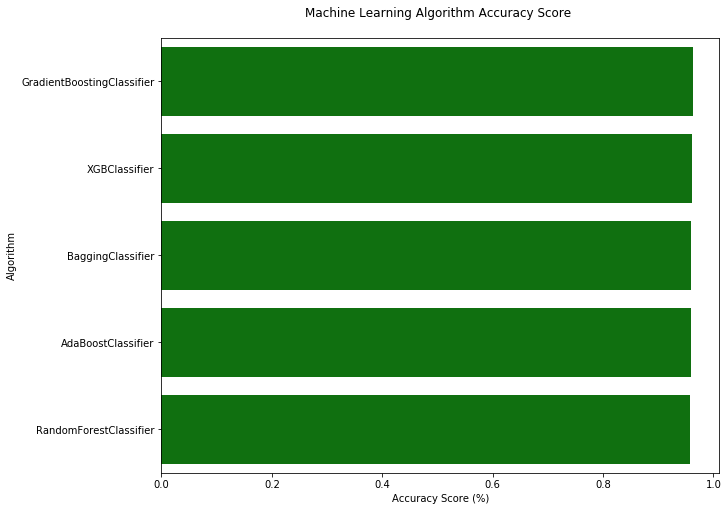

In [81]:
plot_algorithm_performance(algs_compare, 'g')

### Interpretation

In [82]:
# Print the results
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
  if train == True:
    print("Training results:")
    print(f'Accuracy: {metrics.accuracy_score(y_train,classifier.predict(X_train))}')
    print(f'Classification Report')
    print(f'{metrics.classification_report(y_train,classifier.predict(X_train))}')
    print('Confusion Matrix:')
    print(f'{metrics.confusion_matrix(y_train,classifier.predict(X_train))}')
              
    res = model_selection.cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
    print(f'Average Accuracy: {res.mean()}')
              
  elif train == False:
    print("Testing results:")
    print(f'Accuracy: {metrics.accuracy_score(y_test,classifier.predict(X_test))}')
    print(f'Classification Report')
    print(f'{metrics.classification_report(y_test,classifier.predict(X_test))}')
    print('Confusion Matrix:')
    print(f'{metrics.confusion_matrix(y_test,classifier.predict(X_test))}')
    res = model_selection.cross_val_score(classifier, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
    print(f'CV Average Accuracy: {res.mean()}')

In [83]:
def create_graph(forest, feature_names,tree_name):
  estimator = forest.estimators_[5]
  #https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
  tree.export_graphviz(estimator, out_file=f'{tree_name}.dot',
                    feature_names = feature_names,
                    class_names = ['benign', 'malicious'],
                    rounded = True, proportion = False, precision = 2, filled = True)

  # Convert to png using system command
  from subprocess import call
  call(['dot', '-Tpng', f'{tree_name}.dot', '-o', f'{tree_name}.png', '-Gdpi=200'])

In [84]:
def plot_feature_importance(X, feature_importances, title):
  feature_importance_zip = zip(list(X), feature_importances)
  sorted_importance = sorted(feature_importance_zip, key=lambda x: x[1], reverse=True)

  features = X.columns
  importance = feature_importances
  indices = np.argsort(importance).tolist()

  color = plt.cm.Wistia(np.linspace(0, 1, 15))

  plt.rcParams['figure.figsize'] = (15, 10)
  plt.barh(range(len(indices)), importance[indices], color = color)
  plt.yticks(range(len(indices)), features[indices])
  plt.title(title, fontsize = 30)
  plt.grid()
  plt.tight_layout()
  plt.show()

In [85]:
X = data_x.copy()
y = data_y.copy()

In [86]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

rf = best_rfc[0]
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [87]:
print_score(rf,X_train,y_train,X_test,y_test,train=True)       

Training results:
Accuracy: 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1091
           1       1.00      1.00      1.00       150

    accuracy                           1.00      1241
   macro avg       1.00      1.00      1.00      1241
weighted avg       1.00      1.00      1.00      1241

Confusion Matrix:
[[1091    0]
 [   0  150]]
Average Accuracy: 0.9605225806451614


In [88]:
print_score(rf,X_train,y_train,X_test,y_test,train=False)

Testing results:
Accuracy: 0.9624765478424016
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       468
           1       0.91      0.77      0.83        65

    accuracy                           0.96       533
   macro avg       0.94      0.88      0.91       533
weighted avg       0.96      0.96      0.96       533

Confusion Matrix:
[[463   5]
 [ 15  50]]
CV Average Accuracy: 0.9531728753426867


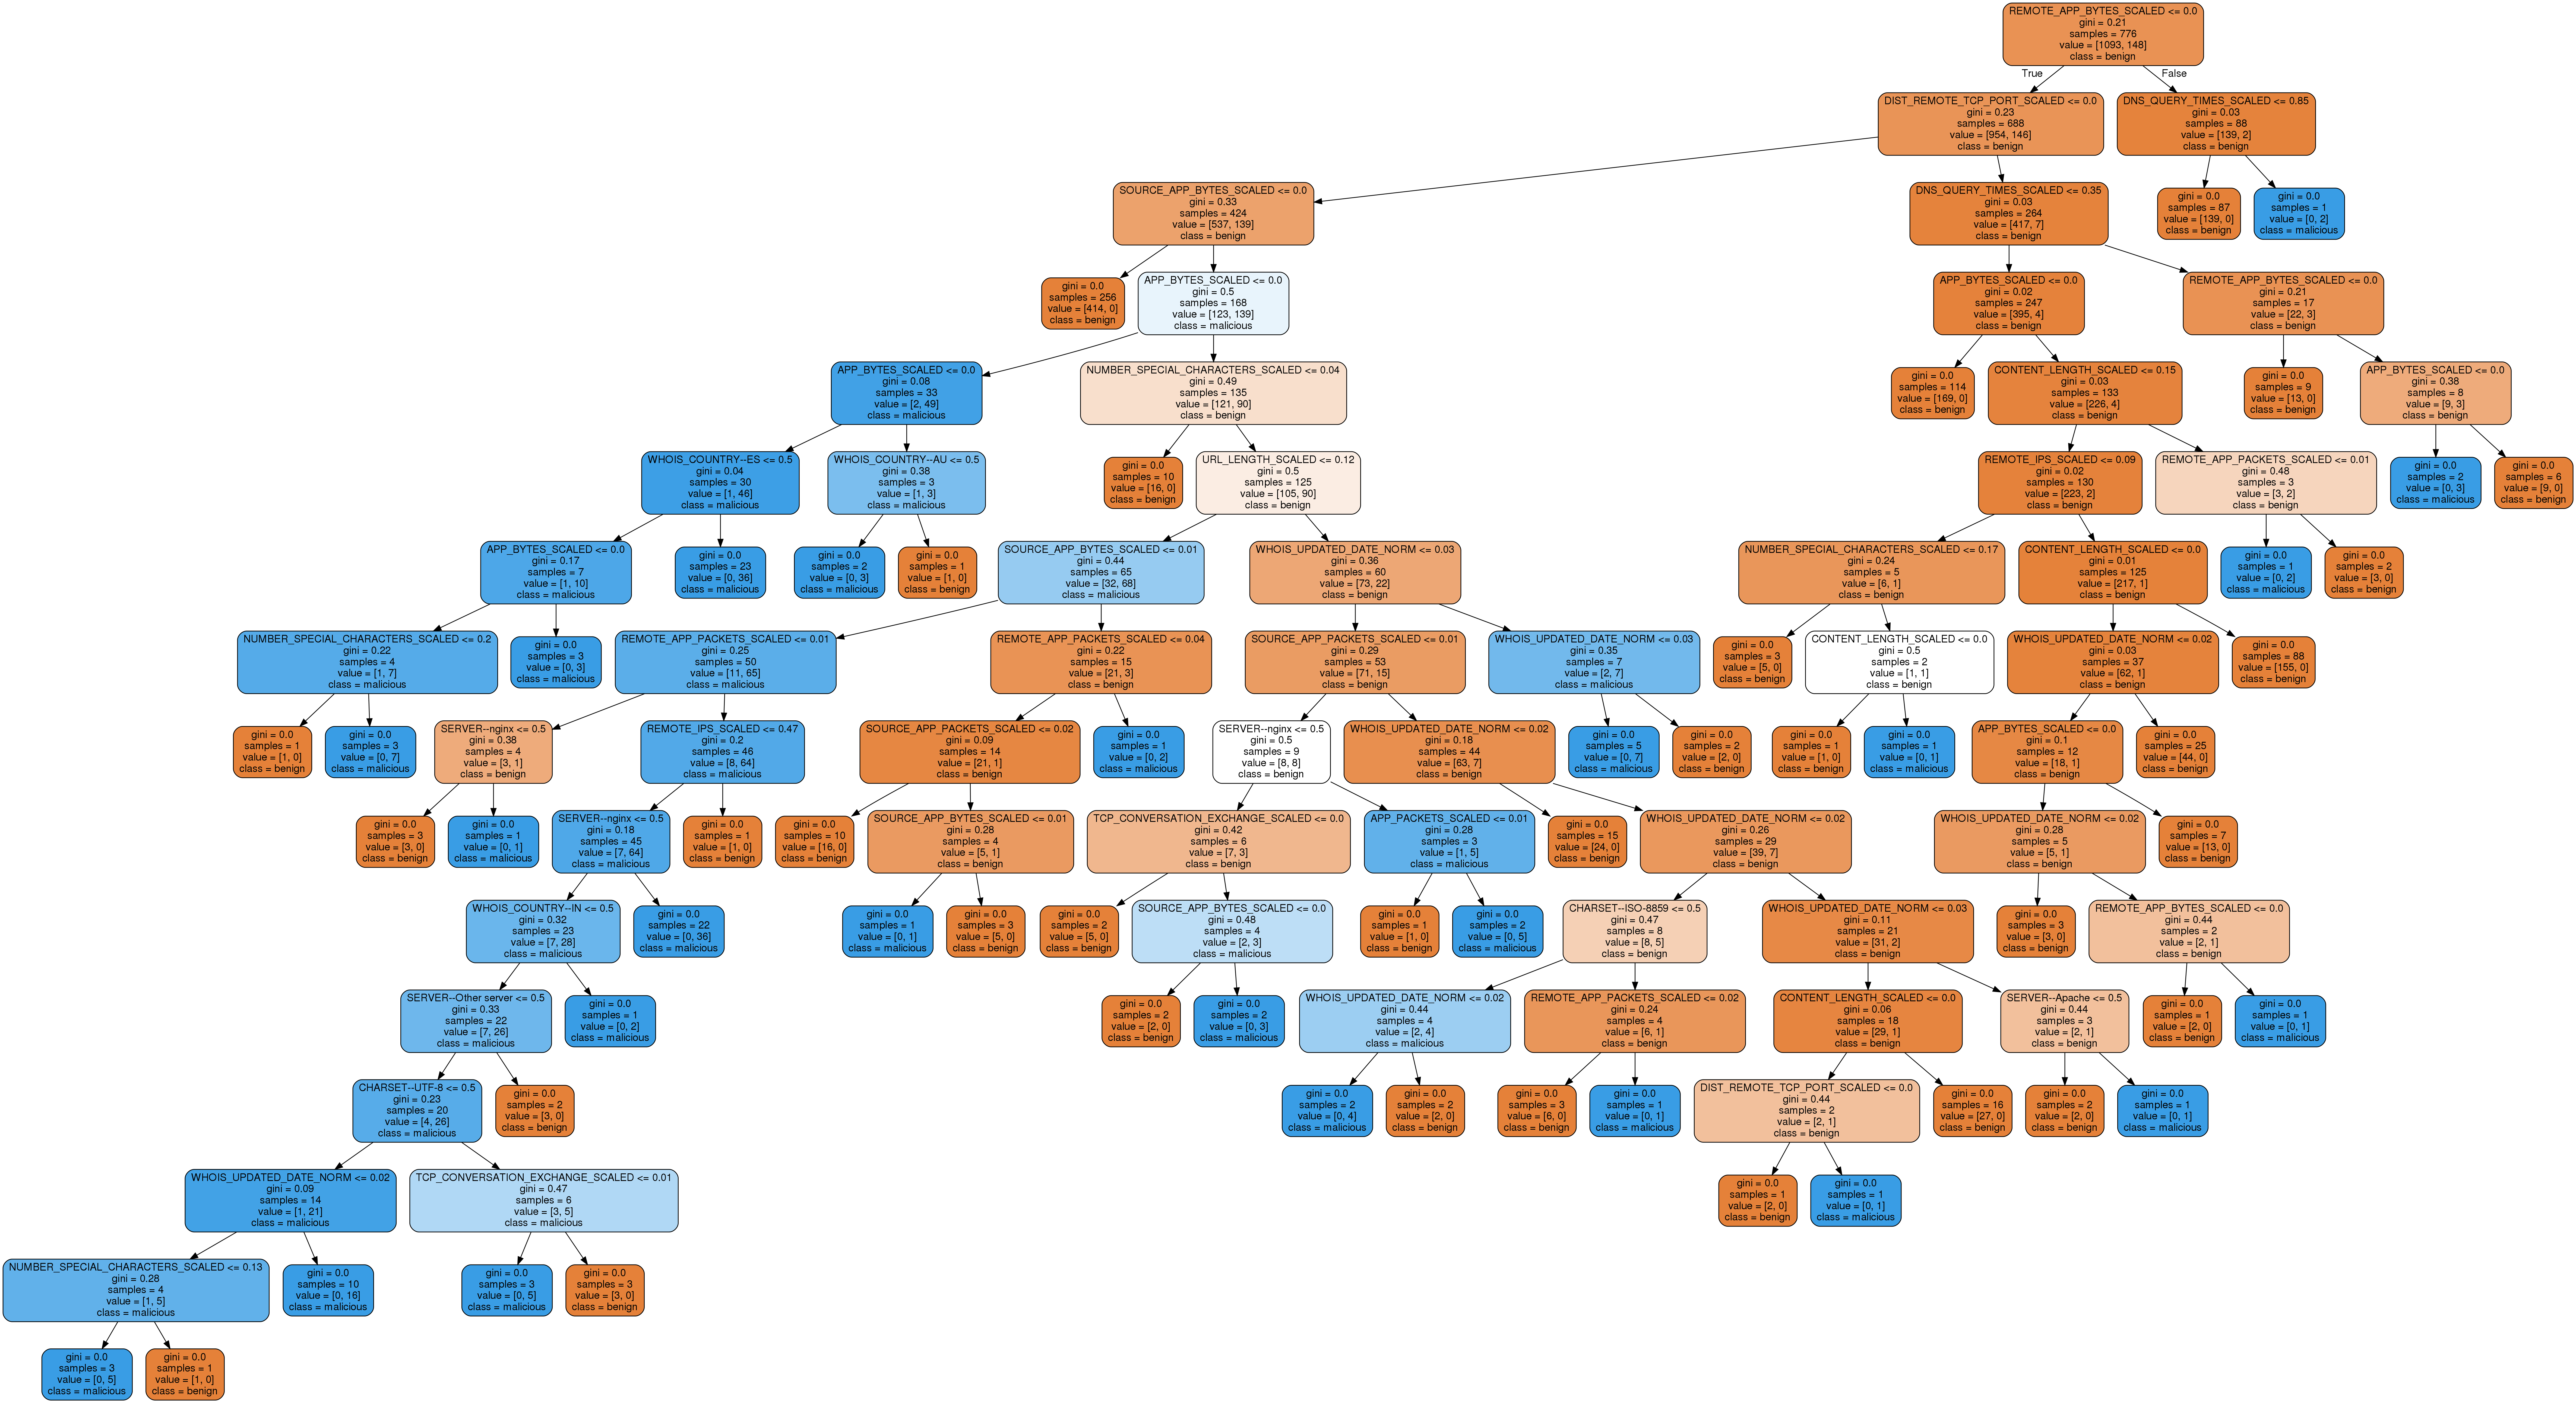

In [92]:
# with dummies 
X = X_train.copy()
y = y_train.copy()

rf1 = best_rfc[0]
rf1.fit(X_train, y_train)
tree_name = 'tree1'
create_graph(rf1, list(X),tree_name)

from IPython.display import Image
Image(filename = f'{tree_name}.png')

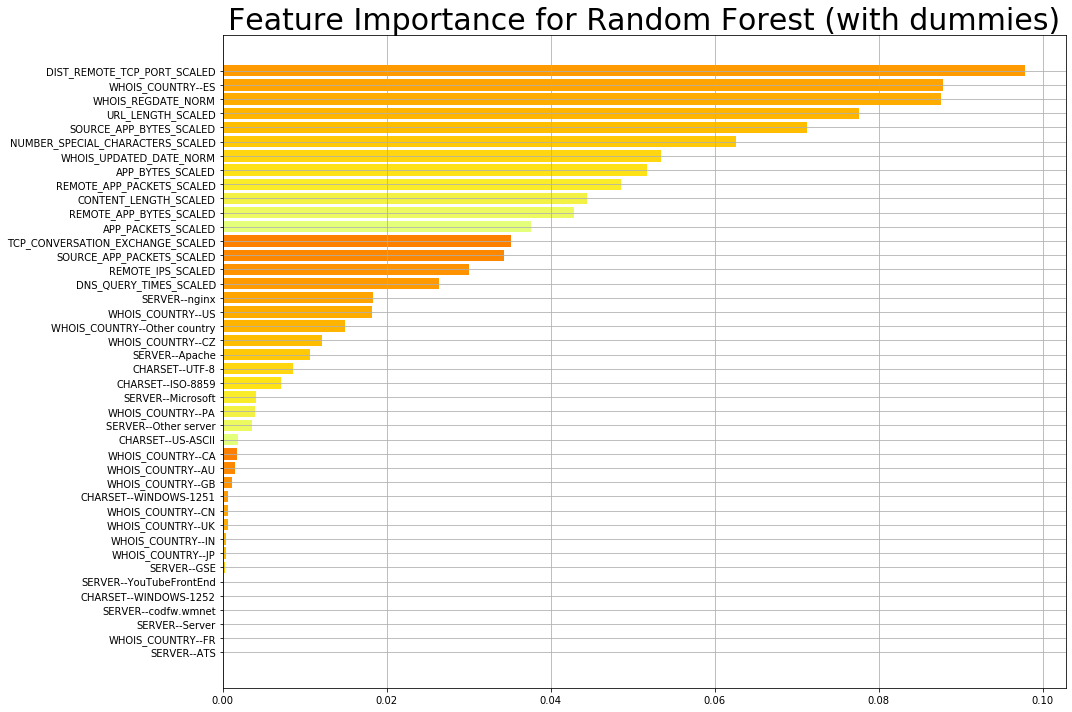

In [93]:
plot_feature_importance(X, rf1.feature_importances_, 'Feature Importance for Random Forest (with dummies)')

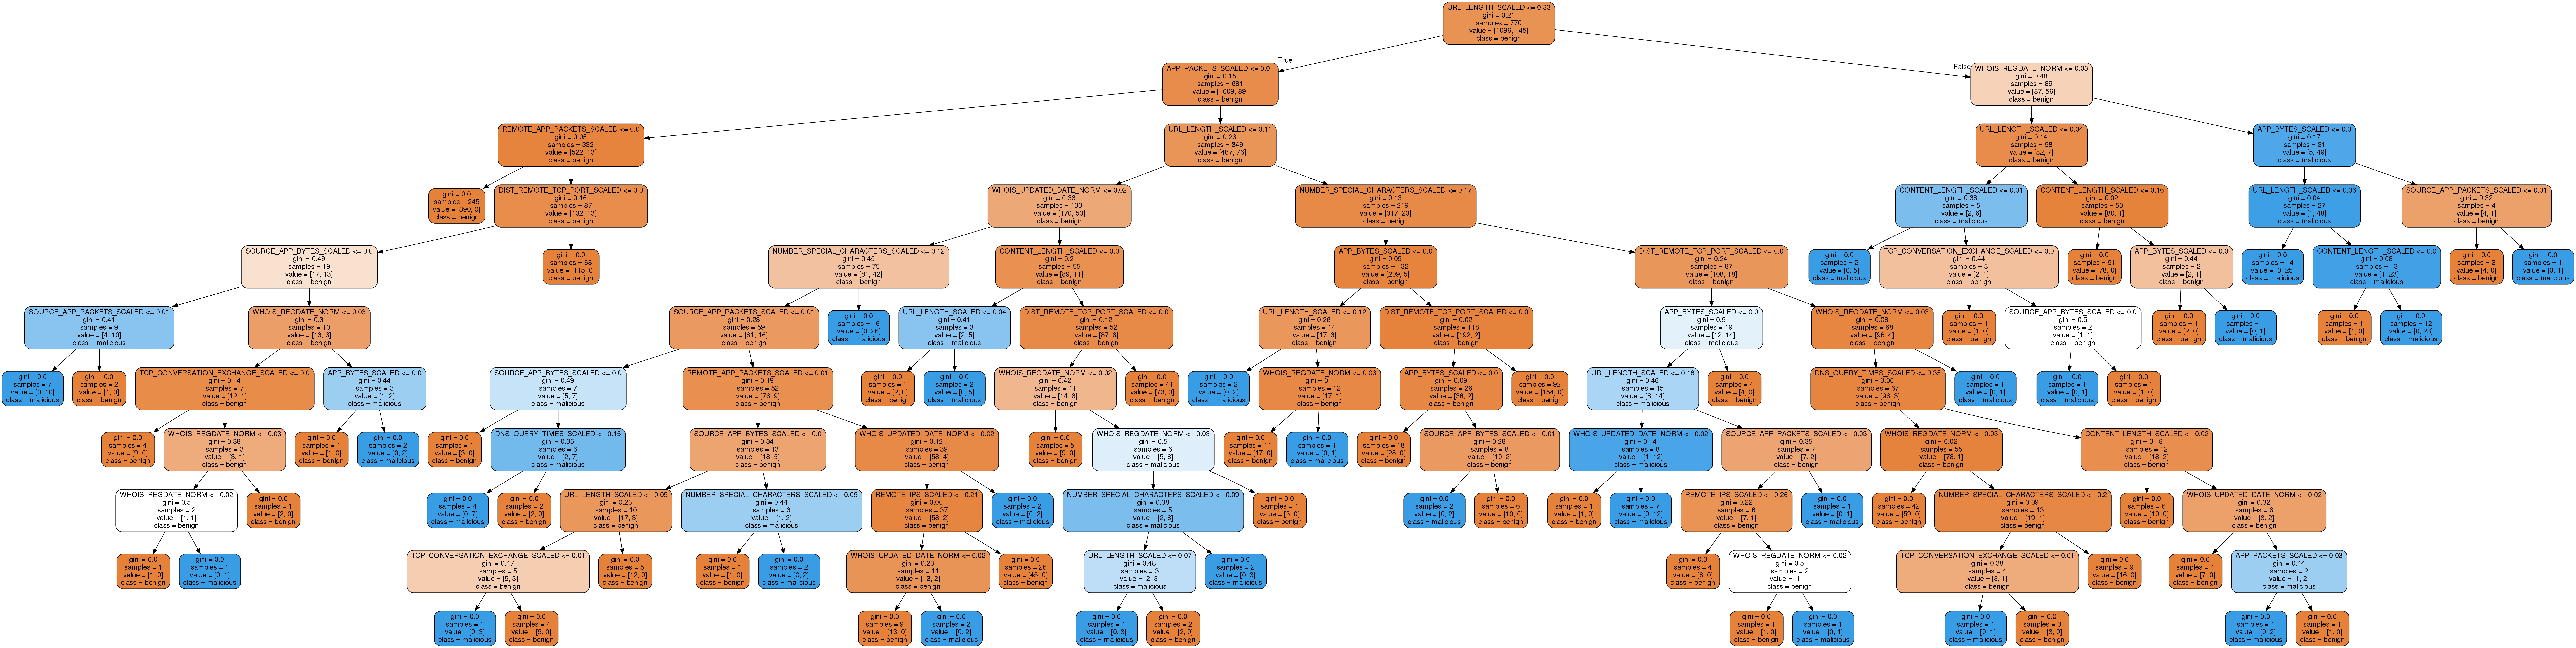

In [94]:
# without dummies 
col_filter = [col for col in X.columns if not '--' in col]
X_reduced = X[col_filter].copy()

rf2 = best_rfc[0]
rf2.fit(X_reduced, y)
tree_name = 'tree2'
create_graph(rf2, list(X_reduced),tree_name)

from IPython.display import Image
Image(filename = f'{tree_name}.png')

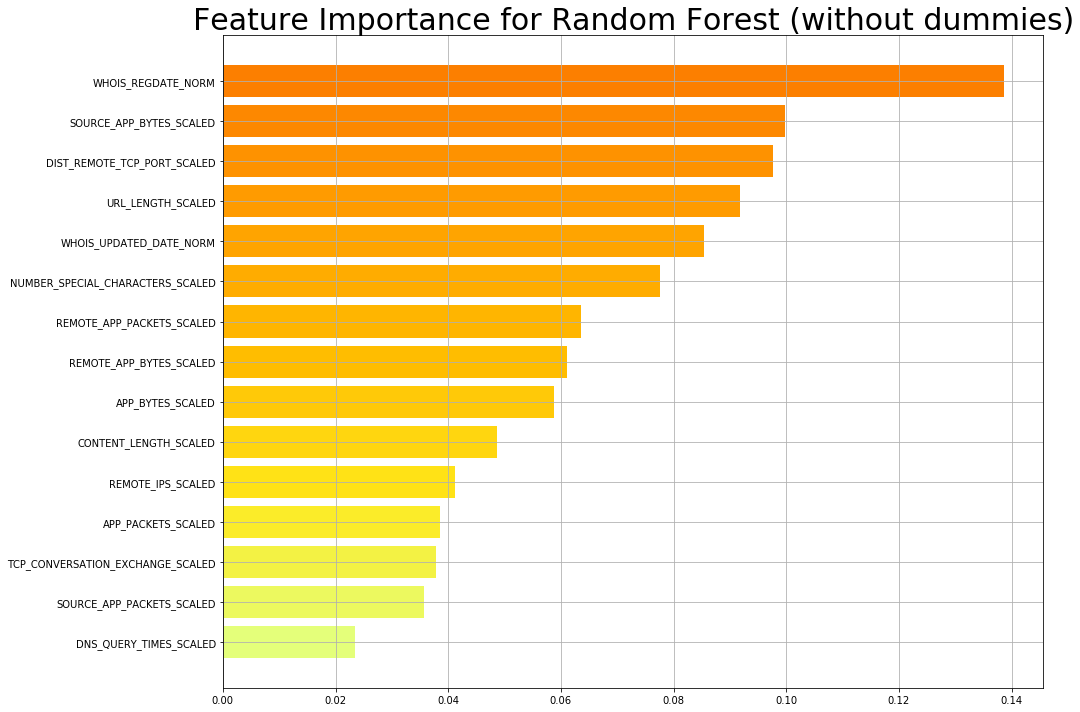

In [95]:
plot_feature_importance(X_reduced, rf2.feature_importances_, 'Feature Importance for Random Forest (without dummies)')